In [ ]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
from datetime import datetime
from google.colab import drive
import numpy as np

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Creación tablas
  

In [ ]:
import pandas as pd

def load_and_combine_data_with_sentiment(file_path, file_path_s, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], sentiment_columns=['finupPartscr', 'findownPartscr']):
    df = pd.read_csv(file_path)
    df_s = pd.read_csv(file_path_s)
    df_s['Sentiment'] = (df_s[sentiment_columns[0]] - df_s[sentiment_columns[1]]) / (df_s[sentiment_columns[0]] + df_s[sentiment_columns[1]])
    merged_df = pd.merge(df[columns], df_s[['Date', 'Sentiment']], on='Date', how='left', suffixes=('', '_s'))
    return merged_df

def load_data(file_path, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume']):
    df = pd.read_csv(file_path)
    return df[columns]

# File paths actualizados
file_path1 = '/content/gdrive/MyDrive/TFG/AMZN.csv'
file_path1_s = '/content/gdrive/MyDrive/TFG/Amazon.csv'

file_path2 = '/content/gdrive/MyDrive/TFG/AAPL.csv'
file_path2_s = '/content/gdrive/MyDrive/TFG/Apple.csv'

file_path3 = '/content/gdrive/MyDrive/TFG/GOOGL.csv'
file_path3_s = '/content/gdrive/MyDrive/TFG/Google.csv'

file_path4 = '/content/gdrive/MyDrive/TFG/META.csv'
file_path4_s = '/content/gdrive/MyDrive/TFG/Facebook.csv'

file_path5 = '/content/gdrive/MyDrive/TFG/NFLX.csv'
file_path5_s = '/content/gdrive/MyDrive/TFG/Netflix.csv'

amazon_s = load_and_combine_data_with_sentiment(file_path1, file_path1_s)
amazon = load_data(file_path1)

apple_s = load_and_combine_data_with_sentiment(file_path2, file_path2_s)
apple = load_data(file_path2)

google_s = load_and_combine_data_with_sentiment(file_path3, file_path3_s)
google = load_data(file_path3)

facebook_s = load_and_combine_data_with_sentiment(file_path4, file_path4_s)
facebook = load_data(file_path4)

netflix_s = load_and_combine_data_with_sentiment(file_path5, file_path5_s)
netflix = load_data(file_path5)



print(amazon.head())
print(amazon_s.head())
print(apple.head())
print(apple_s.head())
print(google.head())
print(google_s.head())
print(facebook.head())
print(facebook_s.head())
print(netflix.head())
print(netflix_s.head())


         Date       Open       High        Low      Close     Volume
0  2019-08-02  92.253502  92.318001  90.401001  91.162003   99124000
1  2019-08-05  88.511002  89.433502  87.439003  88.256500  121164000
2  2019-08-06  89.611504  89.688499  87.669998  89.391502  101406000
3  2019-08-07  88.699501  89.946503  87.849998  89.669998   90538000
4  2019-08-08  90.300003  91.712997  89.905502  91.644501   74024000
         Date       Open       High        Low      Close     Volume  \
0  2019-08-02  92.253502  92.318001  90.401001  91.162003   99124000   
1  2019-08-05  88.511002  89.433502  87.439003  88.256500  121164000   
2  2019-08-06  89.611504  89.688499  87.669998  89.391502  101406000   
3  2019-08-07  88.699501  89.946503  87.849998  89.669998   90538000   
4  2019-08-08  90.300003  91.712997  89.905502  91.644501   74024000   

   Sentiment  
0   0.341890  
1        NaN  
2   0.014883  
3        NaN  
4        NaN  
         Date       Open       High        Low      Close     V

### Grafico imputación
  

In [ ]:
import pandas as pd

def find_missing_sentiment_dates(df):
    missing_sentiment_rows = df[df['Sentiment'].isnull()]
    missing_sentiment_dates = missing_sentiment_rows['Date']
    return missing_sentiment_dates

def missing_summary(missing_dates):
    total_missing = len(missing_dates)
    if total_missing > 0:
        # Convertimos las fechas a datetime
        missing_dates = pd.to_datetime(missing_dates)
        first_missing = missing_dates.min()
        last_missing = missing_dates.max()
        days_period = (last_missing - first_missing).days
    else:
        first_missing = None
        last_missing = None
        days_period = 0

    return total_missing, first_missing, last_missing, days_period

missing_sentiment_dates_dict = {}

stocks = ['Amazon', 'Apple', 'Google', 'Facebook', 'Netflix']

summary_data = []

for stock in stocks:
    df = globals()[f"{stock.lower()}_s"]
    missing_dates = find_missing_sentiment_dates(df)
    total_missing, first_missing, last_missing, days_period = missing_summary(missing_dates)
    summary_data.append([stock, total_missing, first_missing, last_missing, days_period])

summary_df = pd.DataFrame(summary_data, columns=['Stock', 'Total Missing', 'First Missing Date', 'Last Missing Date', 'Days Period'])

print(summary_df)


      Stock  Total Missing First Missing Date Last Missing Date  Days Period
0    Amazon              8         2019-08-05        2021-12-20          868
1     Apple              7         2019-08-05        2021-12-20          868
2    Google            191         2019-08-05        2023-01-10         1254
3  Facebook            139         2019-08-05        2023-12-22         1600
4   Netflix             40         2019-08-05        2022-06-06         1036


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Datos de la tabla proporcionada
data = {
    'Stock': ['Amazon', 'Apple', 'Google', 'Facebook', 'Netflix'],
    'Total Missing': [8, 7, 191, 139, 40],
    'First Missing Date': ['2019-08-05', '2019-08-05', '2019-08-05', '2019-08-05', '2019-08-05'],
    'Last Missing Date': ['2021-12-20', '2021-12-20', '2023-01-10', '2023-12-22', '2022-06-06'],
    'Days Period': [868, 868, 1254, 1600, 1036]
}

# Creación del DataFrame
df = pd.DataFrame(data)

# Conversión del DataFrame a LaTeX usando tabularx
latex_table = df.to_latex(index=False, column_format='|l|r|l|l|r|', escape=False)

# Ajuste para usar tabularx y resizebox
latex_table = latex_table.replace('\\begin{tabular}', '\\begin{tabularx}{\\textwidth}{|X|r|X|X|r|}')
latex_table = latex_table.replace('\\end{tabular}', '\\end{tabularx}')
latex_table = "\\resizebox{\\textwidth}{!}{" + latex_table + "}"

# Muestra la tabla en formato LaTeX
print(latex_table)


\resizebox{\textwidth}{!}{\begin{tabularx}{\textwidth}{|X|r|X|X|r|}{|l|r|l|l|r|}
\toprule
Stock & Total Missing & First Missing Date & Last Missing Date & Days Period \\
\midrule
Amazon & 8 & 2019-08-05 & 2021-12-20 & 868 \\
Apple & 7 & 2019-08-05 & 2021-12-20 & 868 \\
Google & 191 & 2019-08-05 & 2023-01-10 & 1254 \\
Facebook & 139 & 2019-08-05 & 2023-12-22 & 1600 \\
Netflix & 40 & 2019-08-05 & 2022-06-06 & 1036 \\
\bottomrule
\end{tabularx}
}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

def find_missing_sentiment_dates(df):
    missing_sentiment_rows = df[df['Sentiment'].isnull()]
    missing_sentiment_dates = missing_sentiment_rows['Date']
    missing_sentiment_dates_df = pd.DataFrame({'Date': missing_sentiment_dates})
    return missing_sentiment_dates_df

missing_sentiment_dates_dict = {}

stocks = ['Amazon', 'Apple', 'Google', 'Facebook', 'Netflix']

for stock in stocks:
    df = globals()[f"{stock.lower()}_s"]
    missing_sentiment_dates_dict[stock] = find_missing_sentiment_dates(df)

for stock, missing_dates_df in missing_sentiment_dates_dict.items():
    print(f"Missing sentiment dates for {stock}:")
    # Imprime las primeras 8 filas de cada DataFrame
    print(missing_dates_df.head(8))
    # Imprime el número total de filas en cada DataFrame
    print(f"Total rows: {len(missing_dates_df)}")
    print()


Missing sentiment dates for Amazon:
           Date
1    2019-08-05
3    2019-08-07
4    2019-08-08
5    2019-08-09
252  2020-08-03
267  2020-08-24
458  2021-05-27
601  2021-12-20
Total rows: 8

Missing sentiment dates for Apple:
           Date
1    2019-08-05
3    2019-08-07
4    2019-08-08
5    2019-08-09
252  2020-08-03
272  2020-08-31
601  2021-12-20
Total rows: 7

Missing sentiment dates for Google:
          Date
1   2019-08-05
3   2019-08-07
4   2019-08-08
5   2019-08-09
60  2019-10-28
70  2019-11-11
71  2019-11-12
72  2019-11-13
Total rows: 191

Missing sentiment dates for Facebook:
           Date
1    2019-08-05
3    2019-08-07
4    2019-08-08
5    2019-08-09
150  2020-03-09
233  2020-07-07
242  2020-07-20
252  2020-08-03
Total rows: 139

Missing sentiment dates for Netflix:
           Date
1    2019-08-05
3    2019-08-07
4    2019-08-08
5    2019-08-09
252  2020-08-03
253  2020-08-04
254  2020-08-05
256  2020-08-07
Total rows: 40



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


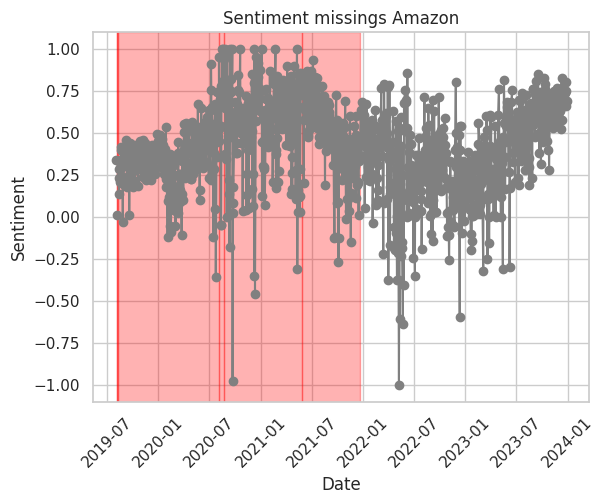

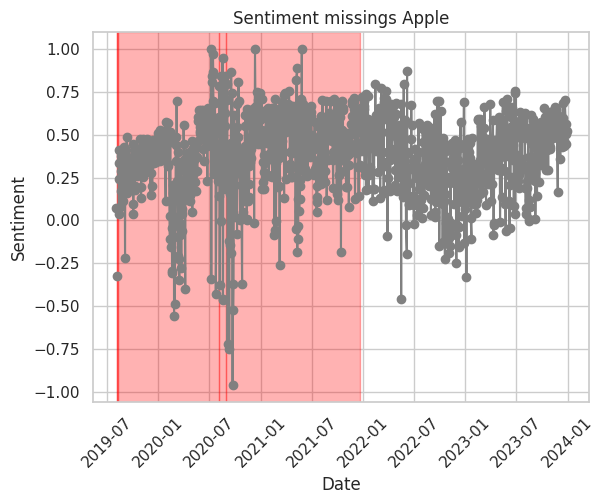

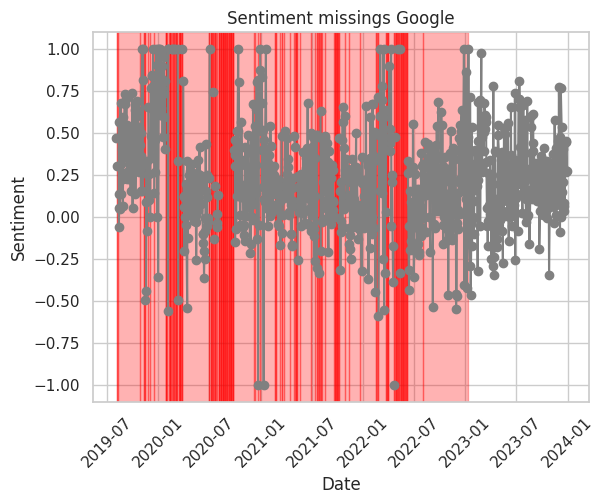

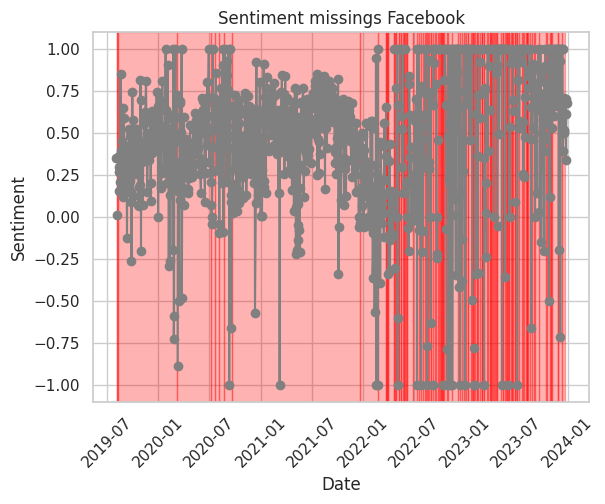

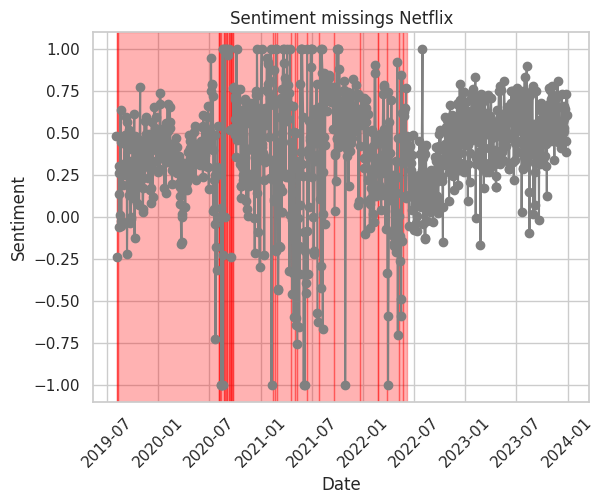

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_sentiment(df, stock):
    # Convertir la columna 'Date' a formato de fecha
    df['Date'] = pd.to_datetime(df['Date'])

    # Crear una figura y ejes
    fig, ax = plt.subplots()

    # Graficar el sentimiento
    ax.plot(df['Date'], df['Sentiment'], marker='o', linestyle='-', color='grey')

    # Marcar las fechas faltantes con un color claro
    missing_dates = find_missing_sentiment_dates(df)
    for date in missing_dates['Date']:
        sentiment = df[df['Date'] == date]['Sentiment'].iloc[0]
        ax.scatter(date, sentiment, color='red', zorder=5)

    # Pintar la línea de sentimiento de amarillo en áreas con missings
    missing_dates_index = df[df['Date'].isin(missing_dates['Date'])].index
    for start, end in zip(missing_dates_index[:-1], missing_dates_index[1:]):
        ax.axvspan(df.loc[start, 'Date'], df.loc[end, 'Date'], color='red', alpha=0.3)

    # Configurar etiquetas y título
    ax.set_xlabel('Date')
    ax.set_ylabel('Sentiment')
    ax.set_title(f'Sentiment missings {stock}')

    # Rotar las fechas para una mejor visualización
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

# Crear el gráfico para cada acción
for stock, df in missing_sentiment_dates_dict.items():
    plot_sentiment(globals()[f"{stock.lower()}_s"], stock)


### Imputacion datos (Interpolación lineal)


In [ ]:
#amazon.set_index('Date', inplace=True)
#amazon_s.set_index('Date', inplace=True)

import pandas as pd

def Interpolacion(df):
    df['Sentiment'] = df['Sentiment'].interpolate(method='linear')
    return df

amazon_s = Interpolacion(amazon_s)
facebook_s = Interpolacion(facebook_s)
apple_s = Interpolacion(apple_s)
google_s = Interpolacion(google_s)
netflix_s = Interpolacion(netflix_s)

print(amazon_s.head())

        Date       Open       High        Low      Close     Volume  Sentiment
0 2019-08-02  92.253502  92.318001  90.401001  91.162003   99124000   0.341890
1 2019-08-05  88.511002  89.433502  87.439003  88.256500  121164000   0.178386
2 2019-08-06  89.611504  89.688499  87.669998  89.391502  101406000   0.014883
3 2019-08-07  88.699501  89.946503  87.849998  89.669998   90538000   0.082431
4 2019-08-08  90.300003  91.712997  89.905502  91.644501   74024000   0.149980


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Normalización

In [ ]:
from sklearn.preprocessing import MinMaxScaler
amazon.set_index('Date', inplace=True)
amazon_s.set_index('Date', inplace=True)
facebook.set_index('Date', inplace=True)
facebook_s.set_index('Date', inplace=True)
apple.set_index('Date', inplace=True)
apple_s.set_index('Date', inplace=True)
google.set_index('Date', inplace=True)
google_s.set_index('Date', inplace=True)
netflix.set_index('Date', inplace=True)
netflix_s.set_index('Date', inplace=True)

def normalize_dataframe(df):
    features = df.copy()  # Tomar todas las columnas como características
    index = df.index  # Mantener el índice original
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(features)
    normalized_df = pd.DataFrame(normalized_data, columns=features.columns, index=index)
    return normalized_df, scaler

amazon, scaler_amazon = normalize_dataframe(amazon)
amazon_s, scaler_amazon_s = normalize_dataframe(amazon_s)
facebook, scaler_facebook = normalize_dataframe(facebook)
facebook_s, scaler_facebook_s = normalize_dataframe(facebook_s)
apple, scaler_apple = normalize_dataframe(apple)
apple_s, scaler_apple_s = normalize_dataframe(apple_s)
google, scaler_google = normalize_dataframe(google)
google_s, scaler_google_s = normalize_dataframe(google_s)
netflix, scaler_netflix = normalize_dataframe(netflix)
netflix_s, scaler_netflix_s = normalize_dataframe(netflix_s)


print(amazon)
print(amazon_s)

                Open      High       Low     Close    Volume
Date                                                        
2019-08-02  0.096819  0.084032  0.087886  0.089183  0.277468
2019-08-05  0.061218  0.056606  0.059278  0.061446  0.352506
2019-08-06  0.071686  0.059031  0.061509  0.072281  0.285238
2019-08-07  0.063011  0.061484  0.063247  0.074940  0.248236
2019-08-08  0.078236  0.078280  0.083100  0.093790  0.192013
...              ...       ...       ...       ...       ...
2023-12-22  0.681996  0.673836  0.689684  0.683529  0.040359
2023-12-26  0.679998  0.670318  0.692775  0.683434  0.025334
2023-12-27  0.679998  0.677924  0.693644  0.682765  0.047013
2023-12-28  0.681521  0.671269  0.692002  0.683147  0.032109
2023-12-29  0.675623  0.669462  0.673458  0.669400  0.075456

[1111 rows x 5 columns]
                Open      High       Low     Close    Volume  Sentiment
Date                                                                   
2019-08-02  0.096819  0.084032  0.0878

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Test de correlacion y causalidad

###### Correlacion por ventanas

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr


def spearman_correlation_windows(data):
    window_size = 20
    num_windows = len(data) - window_size + 1

    for i in range(num_windows):
        window_data = data.iloc[i:i+window_size]
        correlation_matrix = window_data.corr(method='spearman')
        print(f"Window {i+1}-{i+window_size}:\n{correlation_matrix}\n")

spearman_correlation_windows(amazon_s)
#spearman_correlation_windows(apple_s)
#spearman_correlation_windows(google_s)
#spearman_correlation_windows(facebook_s)
#spearman_correlation_windows(netflix_s)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Se han truncado las últimas 5000 líneas del flujo de salida.
Low        0.924812  0.950376  1.000000  0.969925  0.069173   0.457143
Close      0.921805  0.956391  0.969925  1.000000  0.141353   0.455639
Volume     0.270677  0.230075  0.069173  0.141353  1.000000  -0.141353
Sentiment  0.436090  0.505263  0.457143  0.455639 -0.141353   1.000000

Window 538-557:
               Open      High       Low     Close    Volume  Sentiment
Open       1.000000  0.944361  0.902256  0.858647  0.138346   0.401504
High       0.944361  1.000000  0.941353  0.950376  0.183459   0.500752
Low        0.902256  0.941353  1.000000  0.954887 -0.003008   0.433083
Close      0.858647  0.950376  0.954887  1.000000  0.105263   0.461654
Volume     0.138346  0.183459 -0.003008  0.105263  1.000000  -0.123308
Sentiment  0.401504  0.500752  0.433083  0.461654 -0.123308   1.000000

Window 539-558:
               Open      High       Low     Close    Volume  Sentiment
Open       1.000000  0.944361  0.918797  0.884211  0.

###### Distance correlation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


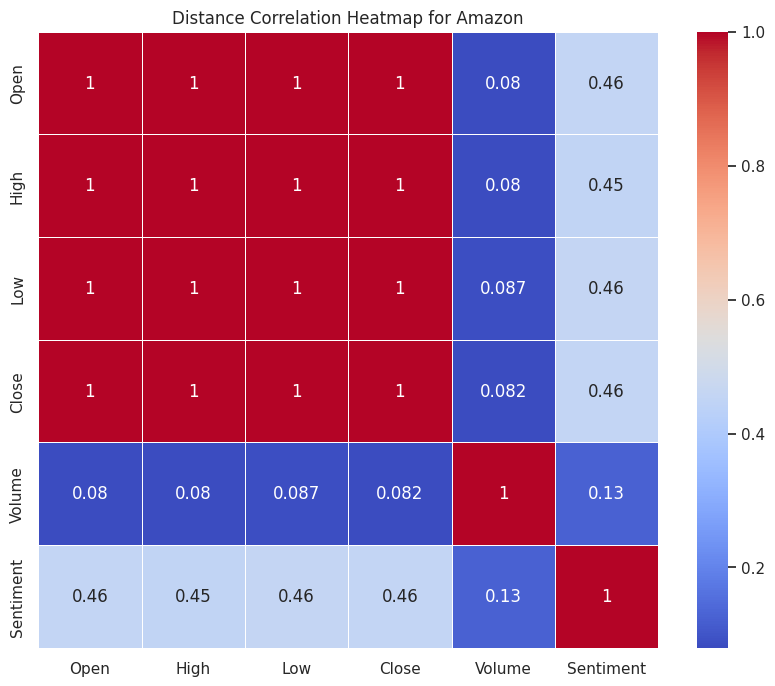

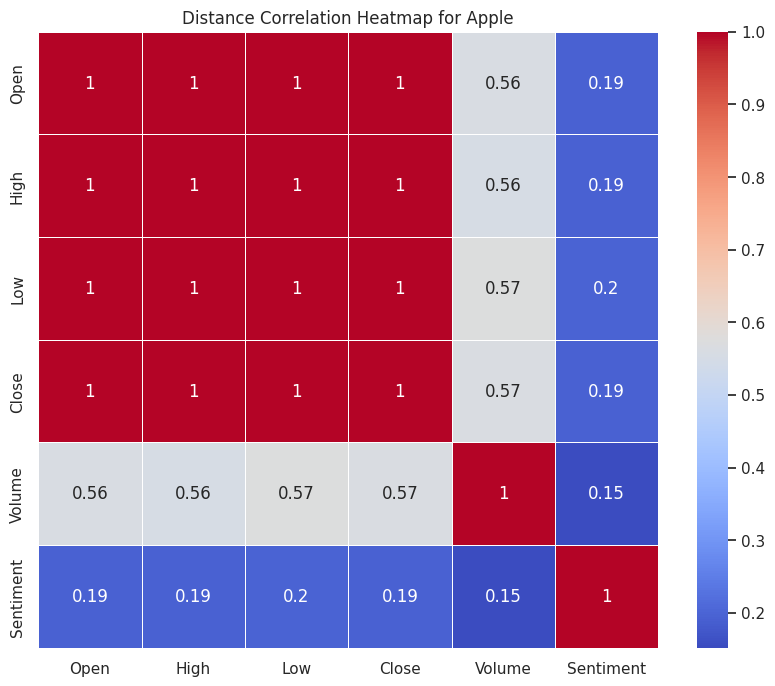

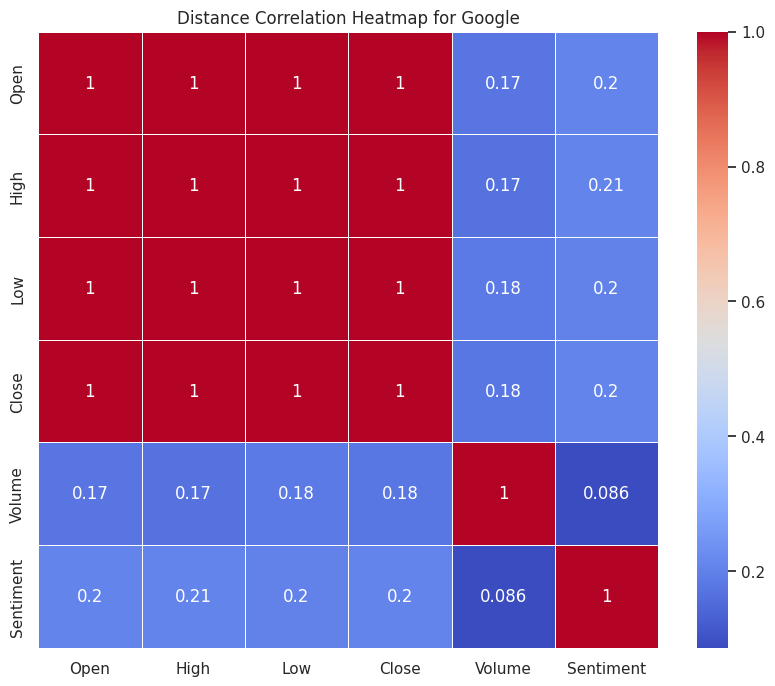

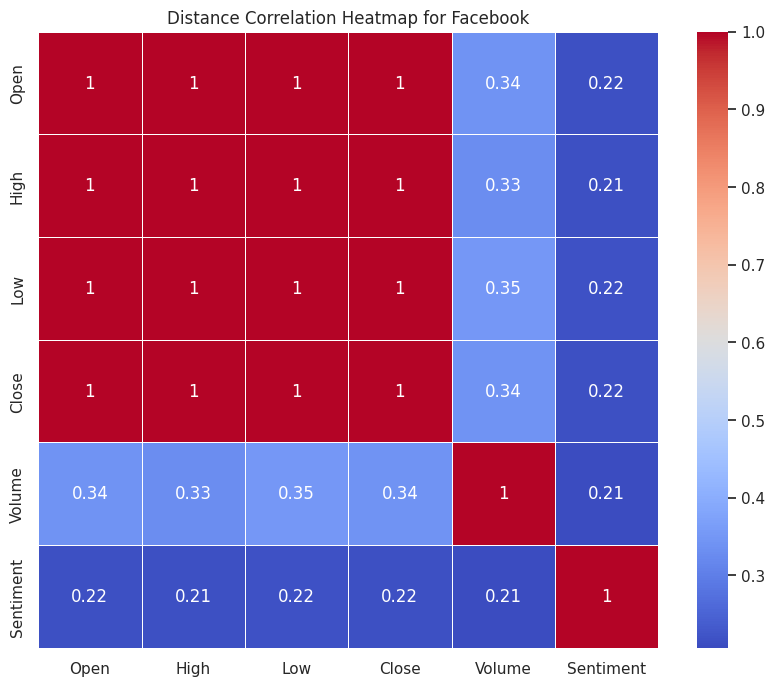

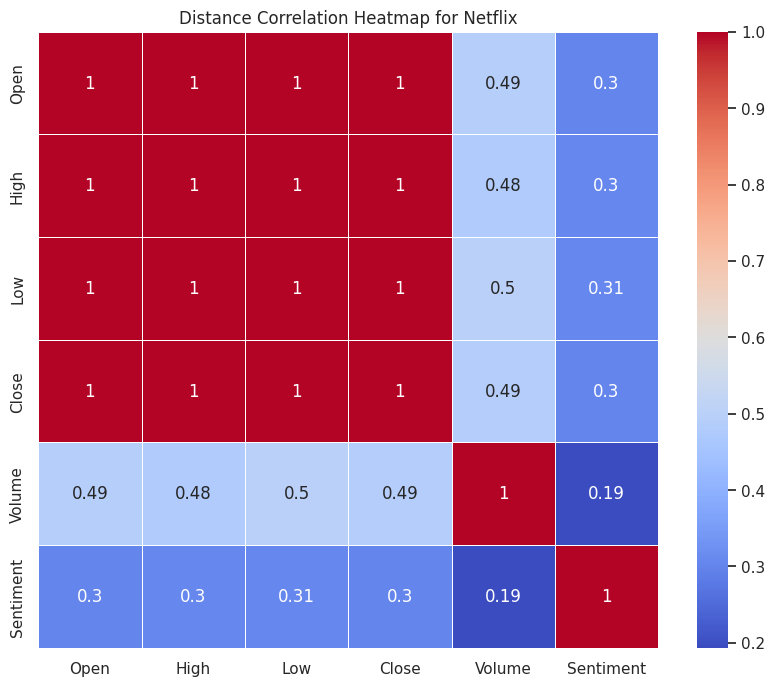

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.dist_dependence_measures import distance_correlation

def distance_correlation_heatmap(data, title):
    # Calcular la distancia de correlación entre todas las combinaciones de variables
    corr_matrix = pd.DataFrame(index=data.columns, columns=data.columns)
    for col1 in data.columns:
        for col2 in data.columns:
            corr_matrix.loc[col1, col2] = distance_correlation(data[col1], data[col2])

    # Crear el mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Distance Correlation Heatmap for {title}')
    plt.show()

# Utiliza la función para cada empresa
distance_correlation_heatmap(amazon_s, 'Amazon')
distance_correlation_heatmap(apple_s, 'Apple')
distance_correlation_heatmap(google_s, 'Google')
distance_correlation_heatmap(facebook_s, 'Facebook')
distance_correlation_heatmap(netflix_s, 'Netflix')

###### Spearman correlation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


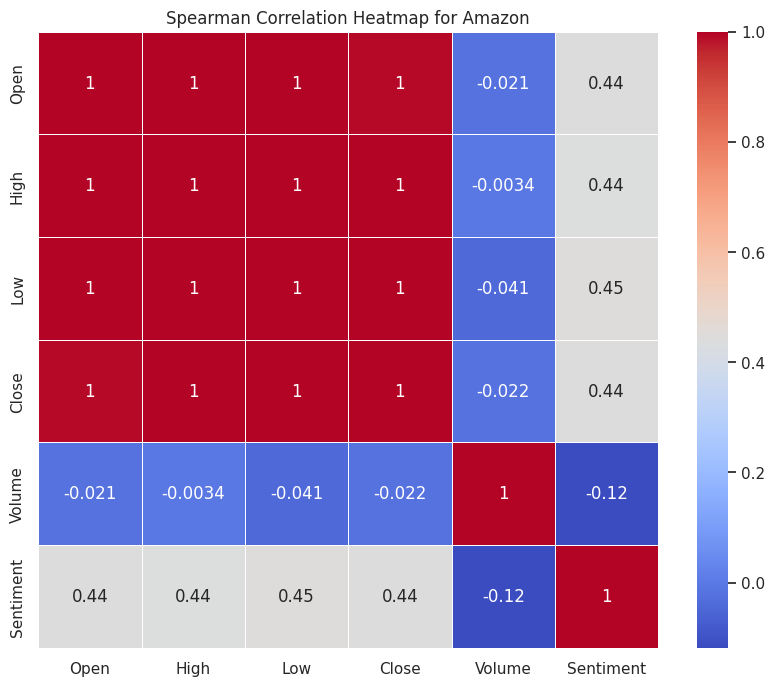

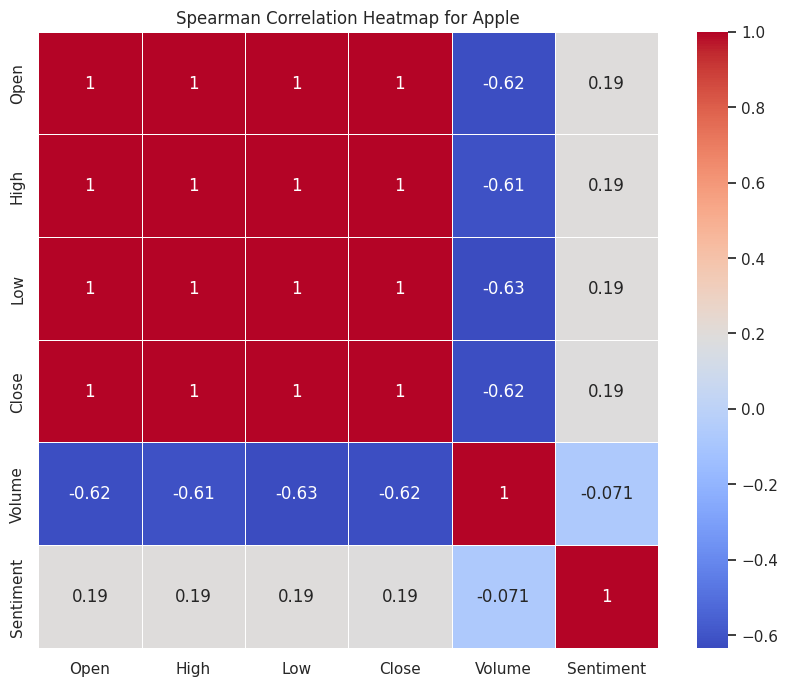

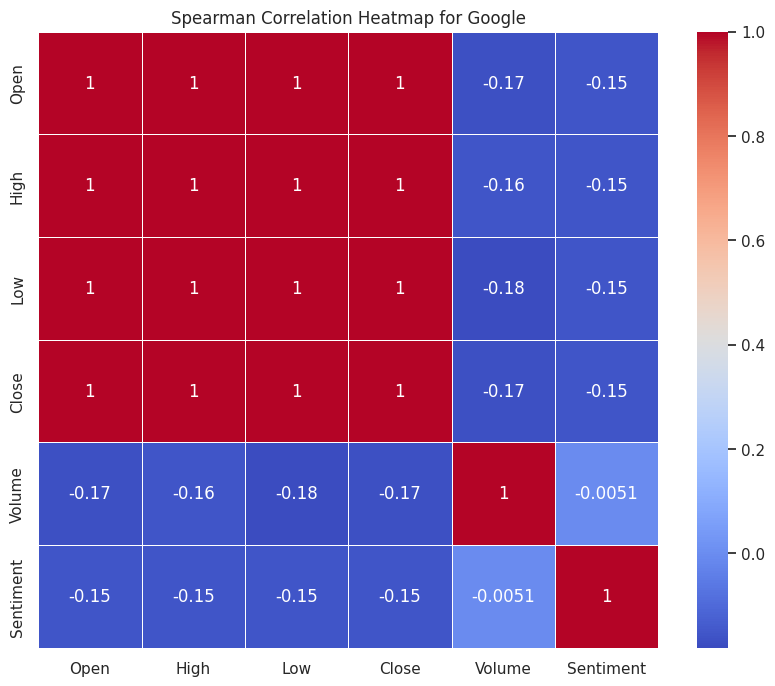

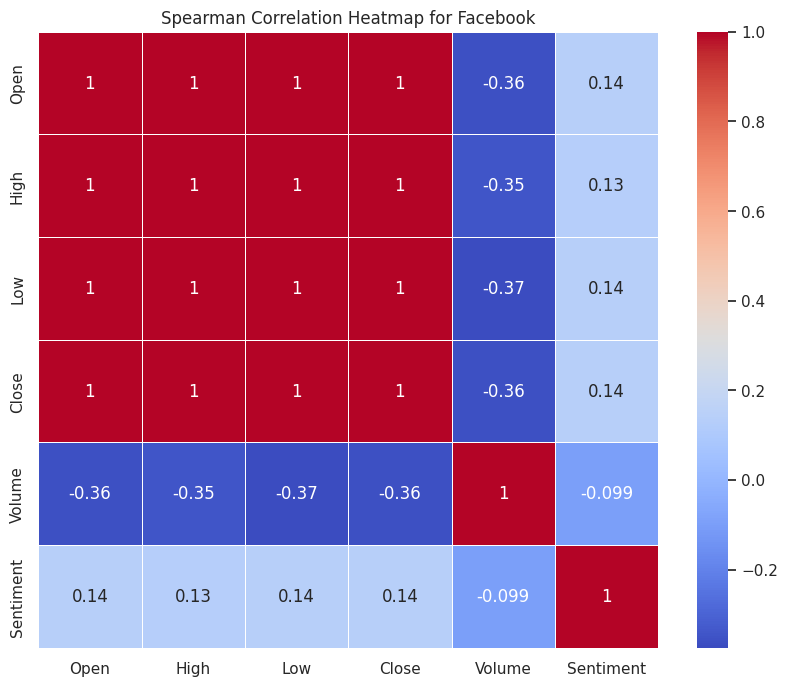

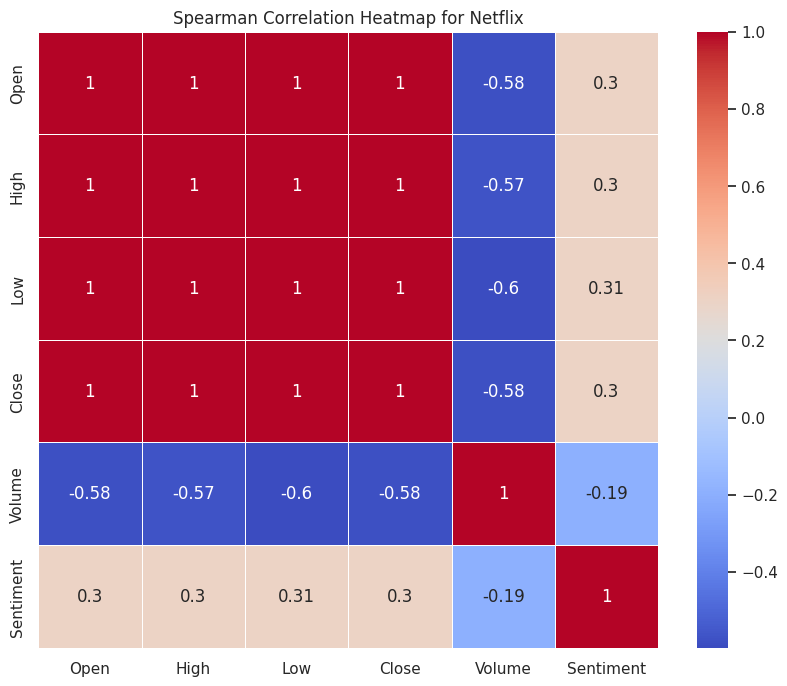

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_spearman_correlation(df, company_name):
    # Calcular el coeficiente de correlación de Spearman
    correlation_matrix = df.corr(method='spearman')

    # Mostrar un mapa de calor con seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5,
                xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
    plt.title(f'Spearman Correlation Heatmap for {company_name}')
    plt.show()

# Aplicar la función a los datos de las 5 empresas
calculate_spearman_correlation(amazon_s, 'Amazon')
calculate_spearman_correlation(apple_s, 'Apple')
calculate_spearman_correlation(google_s, 'Google')
calculate_spearman_correlation(facebook_s, 'Facebook')
calculate_spearman_correlation(netflix_s, 'Netflix')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


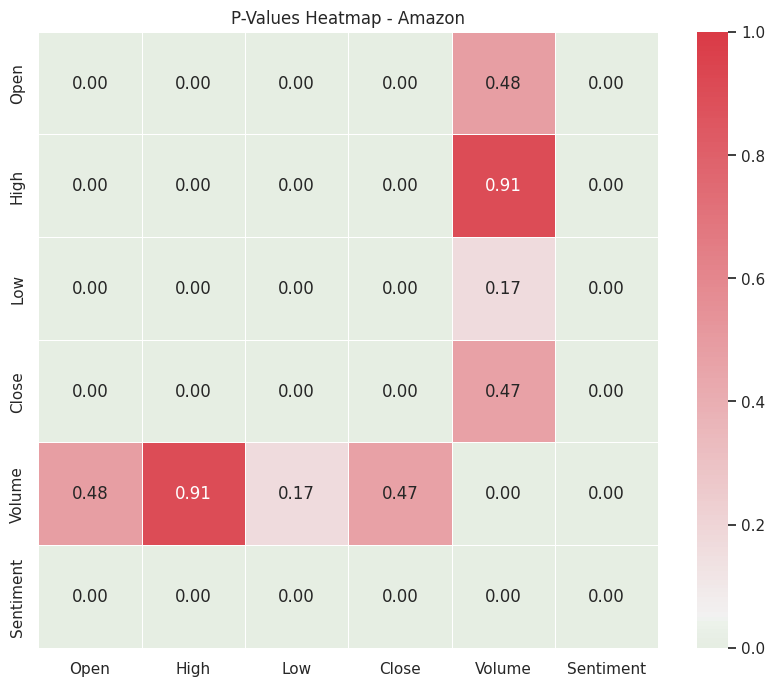

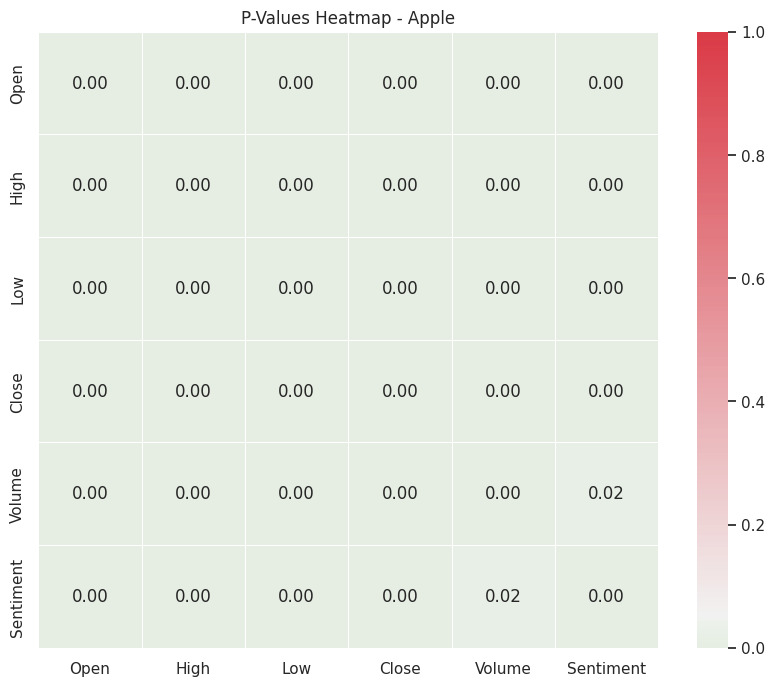

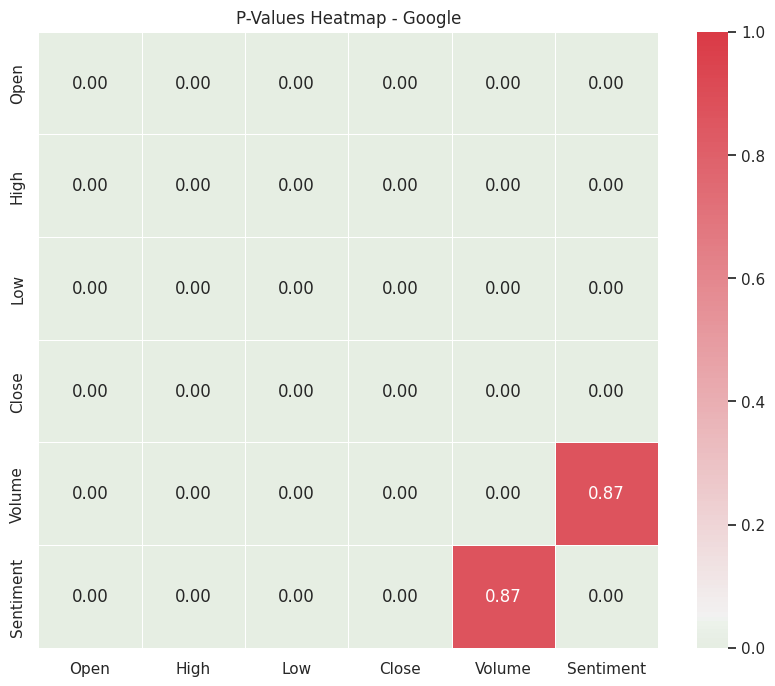

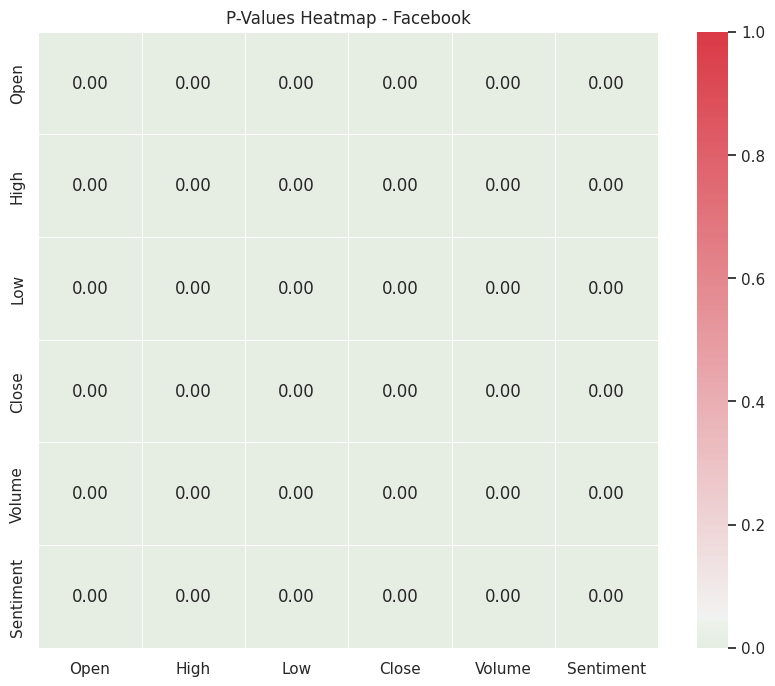

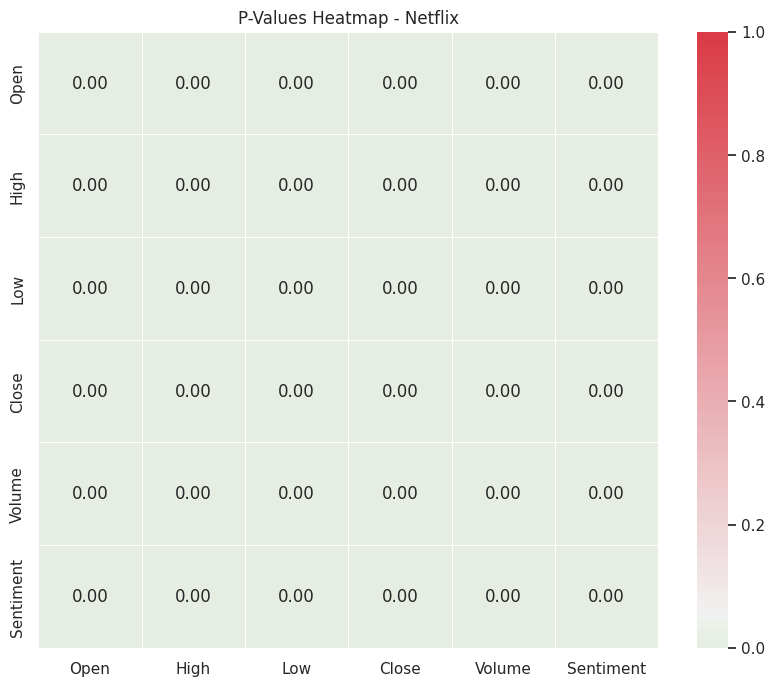

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def visualize_p_values(df, company_name):
    # p-valores de Spearman
    _, p_values = stats.spearmanr(df)
    # paleta de colores personalizada
    cmap = sns.diverging_palette(120, 10, as_cmap=True)
    vmax = 1  # Valor máximo (rojo)
    vmin = 0  # Valor mínimo (verde)
    mid = 0.05  # Punto medio del degradado
    # mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(p_values, cmap=cmap, linewidths=.5, vmin=vmin, vmax=vmax, center=mid,
                annot=True, fmt='.2f', xticklabels=df.columns, yticklabels=df.columns)
    plt.title(f'P-Values Heatmap - {company_name}')
    plt.show()

# Aplicar la función a las 5 empresas
for company, data in {'Amazon': amazon_s, 'Apple': apple_s, 'Google': google_s, 'Facebook': facebook_s, 'Netflix': netflix_s}.items():
    visualize_p_values(data, company)


### Calculo de lag optimo para causalidad

In [ ]:
def var_model_selection(df):
    import warnings
    import numpy as np
    from statsmodels.tsa.api import VAR

    # Obtener las variables del DataFrame excepto 'Close'
    variables_to_pair = ['Sentiment']
    lags_to_test = list(range(1, 21))
    model_results = {}
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message="A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.", category=UserWarning)
        warnings.filterwarnings("ignore", message="A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.", category=Warning)

        aic_values = []
        bic_values = []

        for lag in lags_to_test:
            model = VAR(df[['Close', 'Sentiment']])
            results = model.fit(lag)
            aic_values.append(results.aic)
            bic_values.append(results.bic)

        best_lag_aic = lags_to_test[np.argmin(aic_values)]
        best_lag_bic = lags_to_test[np.argmin(bic_values)]

        model_results['Best Lag AIC'] = best_lag_aic
        model_results['Best Lag BIC'] = best_lag_bic
        model_results['AIC Values'] = aic_values
        model_results['BIC Values'] = bic_values

    warnings.resetwarnings()

    return model_results

model_results_amazon = var_model_selection(amazon_s)
model_results_apple = var_model_selection(apple_s)
model_results_google = var_model_selection(google_s)
model_results_facebook = var_model_selection(facebook_s)
model_results_netflix = var_model_selection(netflix_s)

print("Amazon:", model_results_amazon)
print("Apple:", model_results_apple)
print("Google:", model_results_google)
print("Facebook:", model_results_facebook)
print("Netflix:", model_results_netflix)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Amazon: {'Best Lag AIC': 10, 'Best Lag BIC': 3, 'AIC Values': [-11.455851476273901, -11.519392206534334, -11.549422416664282, -11.55316384595166, -11.571789197028943, -11.566147388168465, -11.565826581690636, -11.561973600321972, -11.573039043003979, -11.577760045367851, -11.569817476458278, -11.564921144348048, -11.560159063734721, -11.5563429619674, -11.5486815888874, -11.546737842875952, -11.540014940364712, -11.537769590088041, -11.53384380727124, -11.528620640797921], 'BIC Values': [-11.428758961169542, -11.474205425764719, -11.486115227005165, -11.47171004216778, -11.472162511671069, -11.448321491369597, -11.42977508096137, -11.407670040344984, -11.400456905427673, -11.386872748599139, -11.360598375454481, -11.337343530407939, -11.314196164288681, -11.291967940366705, -11.265867544192606, -11.24545780964441, -11.220241888437167, -11.199476424374351, -11.177003367535178, -11.153205701441081]}
Apple: {'Best Lag AIC': 9, 'Best Lag BIC': 3, 'AIC Values': [-12.47555972613446, -12.5461

### 1a Opcion: Calcular lag con Exponential Moving Average (EMA)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


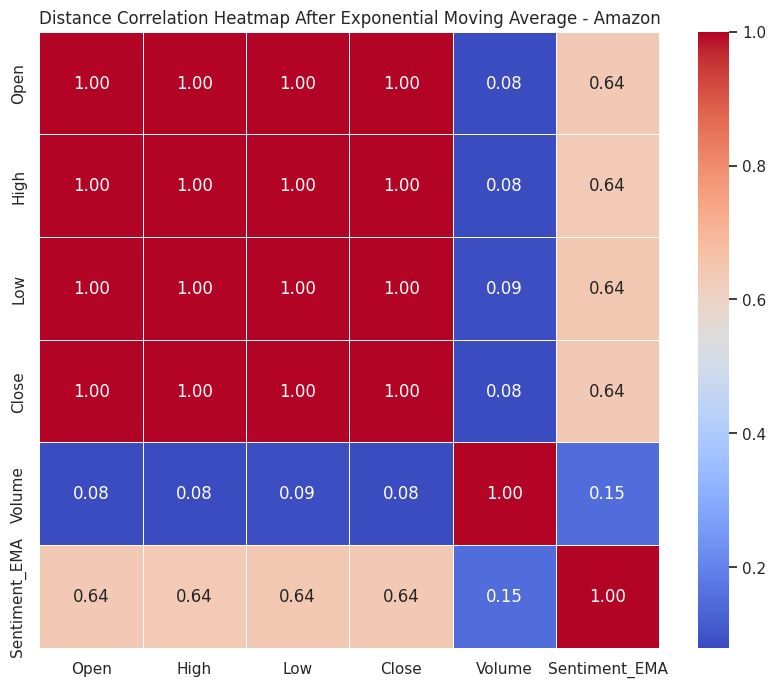

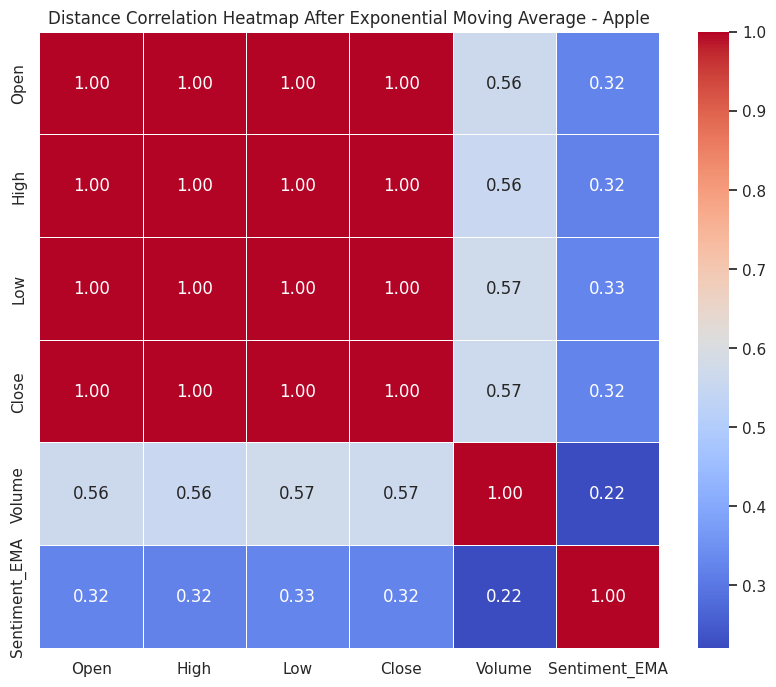

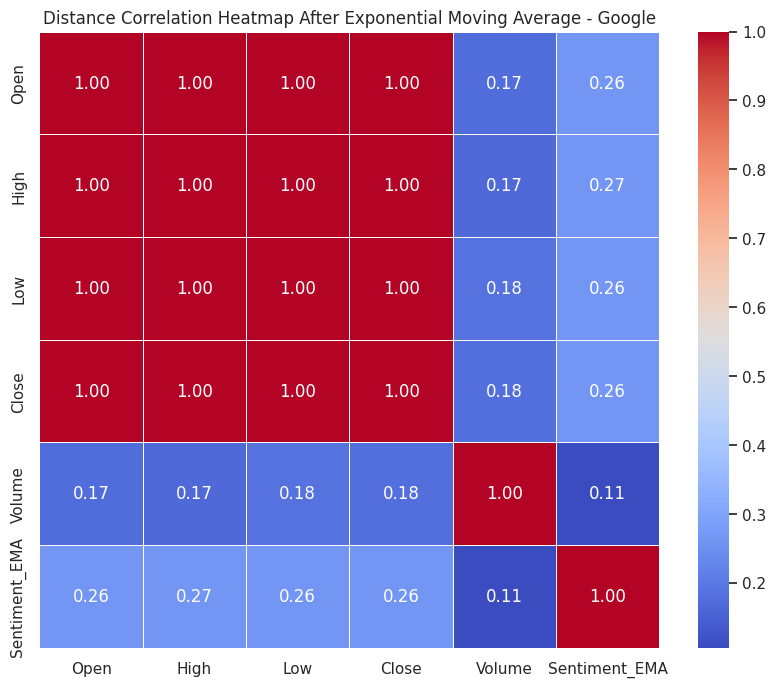

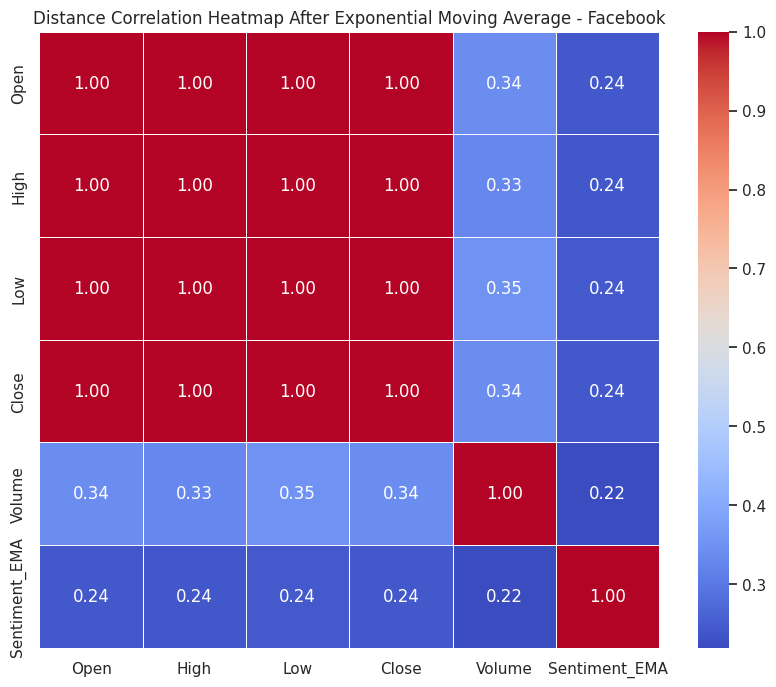

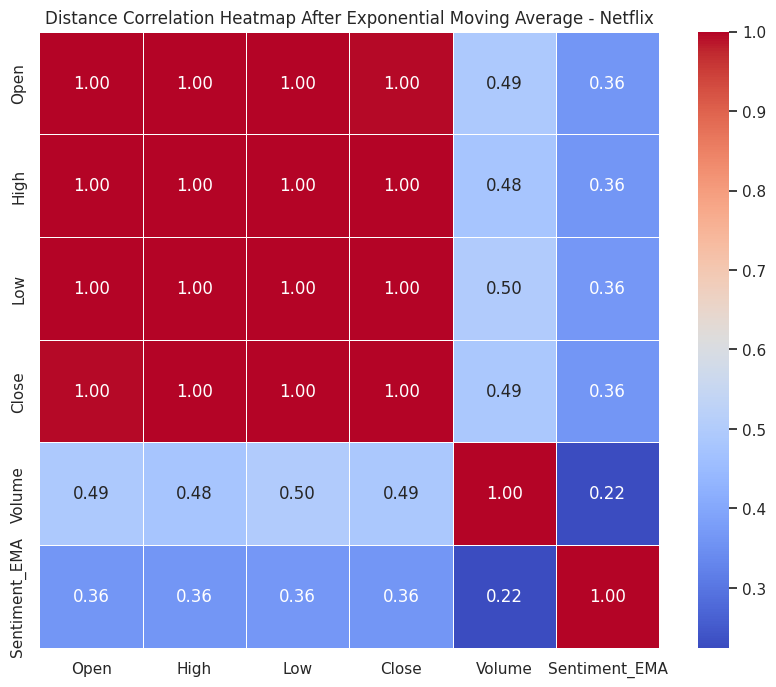

In [ ]:
from statsmodels.stats.dist_dependence_measures import distance_correlation

def calculate_ema_and_distance_correlation(df, model_results, stock_name):
    # Obtener el mejor lag según el AIC para la variable 'Sentiment'
    best_lag = model_results['Best Lag AIC']

    # Aplicar el EMA con el mejor lag a la variable 'Sentiment' y almacenar el resultado en un nuevo DataFrame
    ema_values = df['Sentiment'].ewm(span=best_lag, adjust=False).mean()

    # Reorganizar el DataFrame para que 'Close', 'Low' y 'Volume' estén en las últimas columnas
    ema_df = pd.concat([df[['Open', 'High', 'Low', 'Close', 'Volume']], ema_values], axis=1)
    ema_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment_EMA']

    # Calcular la matriz de distancia de correlación
    distance_correlation_matrix = ema_df.apply(lambda x: ema_df.apply(lambda y: distance_correlation(x, y)))

    # Visualizar la matriz de distancia de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(distance_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f"Distance Correlation Heatmap After Exponential Moving Average - {stock_name}")
    plt.show()

    return ema_df, plt

ema_values_amazon_s, plot_amazon_s = calculate_ema_and_distance_correlation(amazon_s, model_results_amazon, "Amazon")
ema_values_apple_s, plot_apple_s = calculate_ema_and_distance_correlation(apple_s, model_results_apple, "Apple")
ema_values_google_s, plot_google_s = calculate_ema_and_distance_correlation(google_s, model_results_google, "Google")
ema_values_facebook_s, plot_facebook_s = calculate_ema_and_distance_correlation(facebook_s, model_results_facebook, "Facebook")
ema_values_netflix_s, plot_netflix_s = calculate_ema_and_distance_correlation(netflix_s, model_results_netflix, "Netflix")


### Shift y EMA

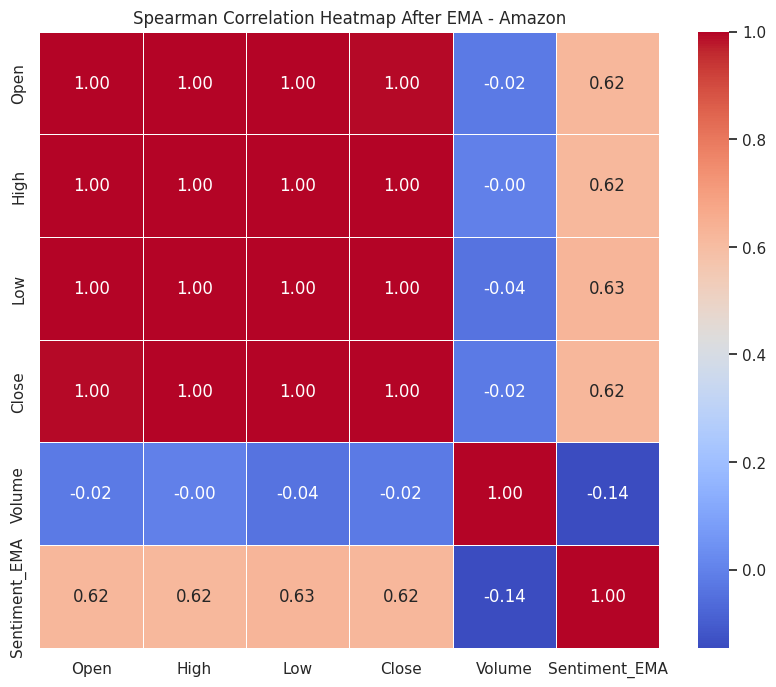

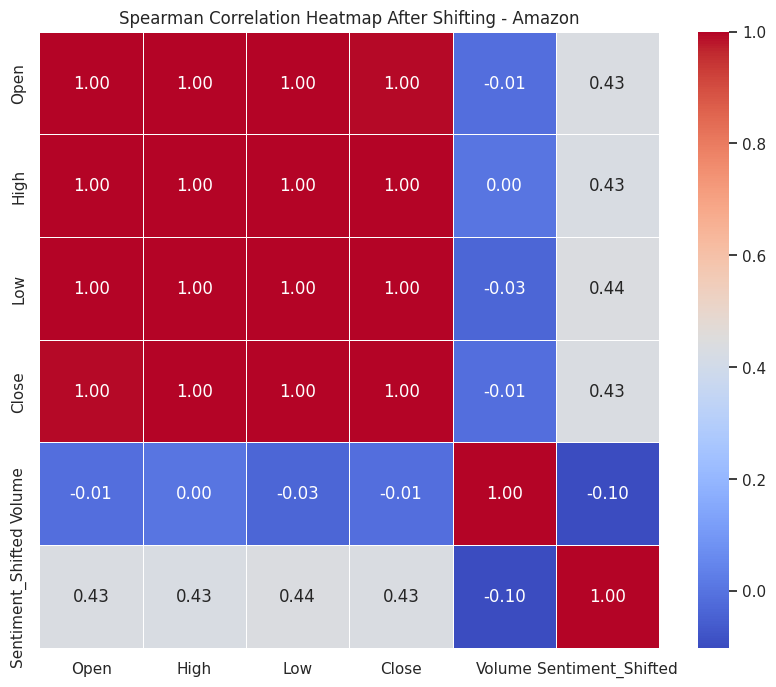

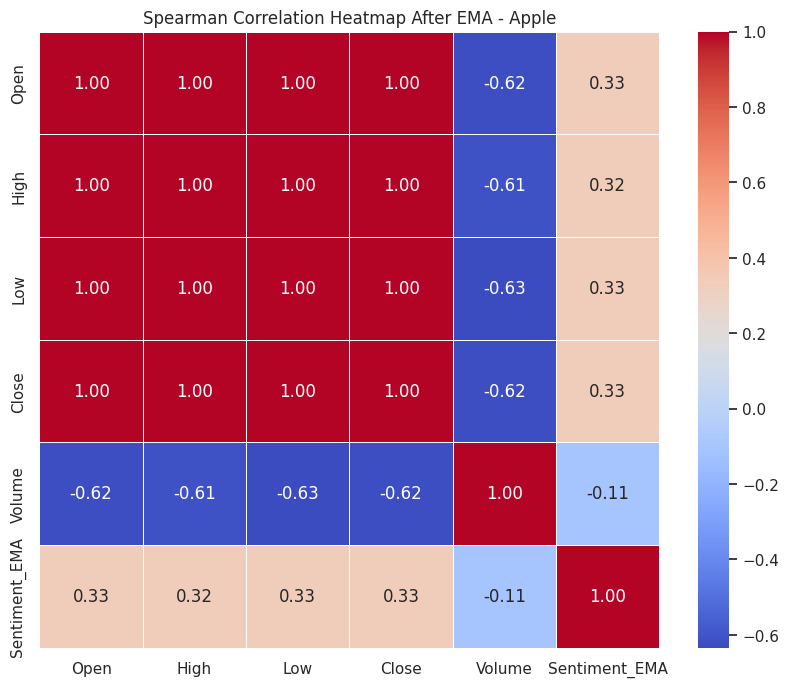

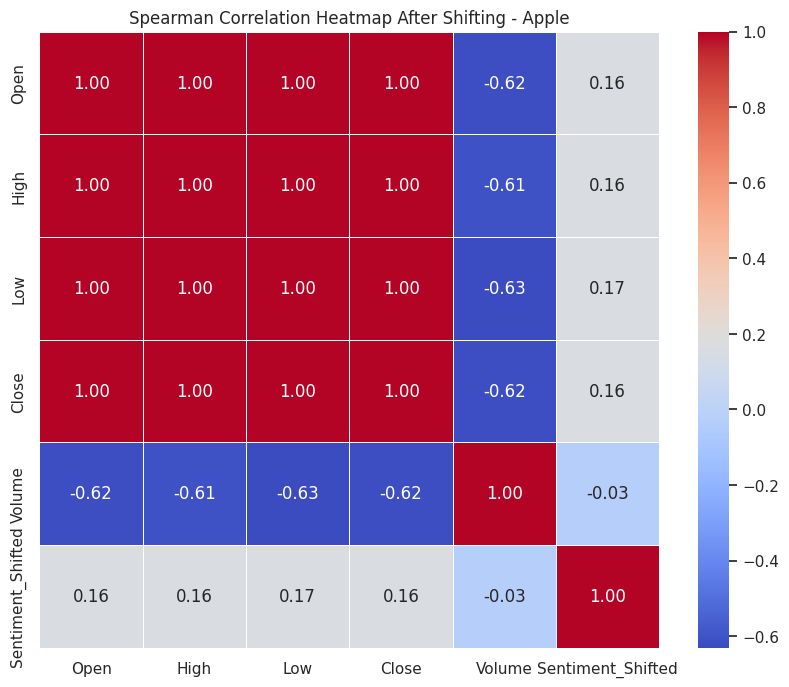

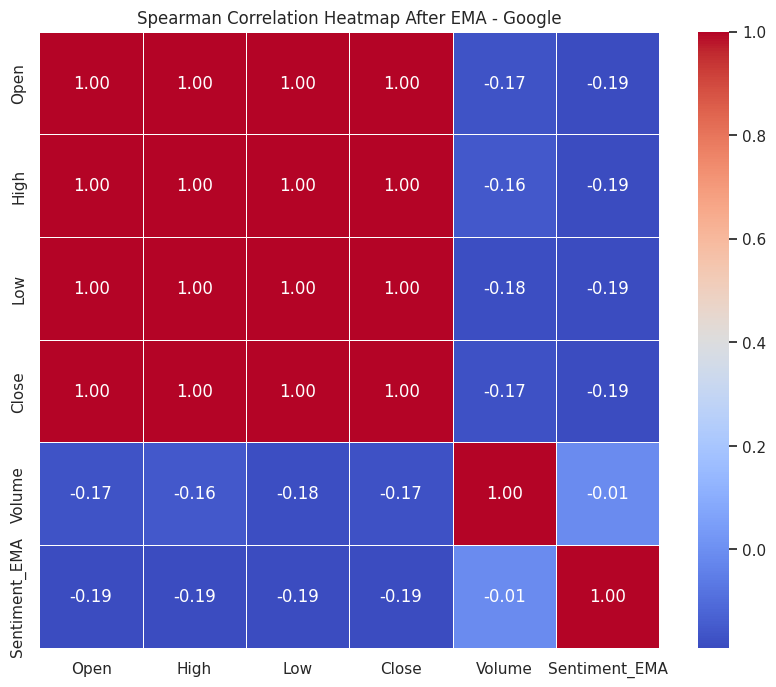

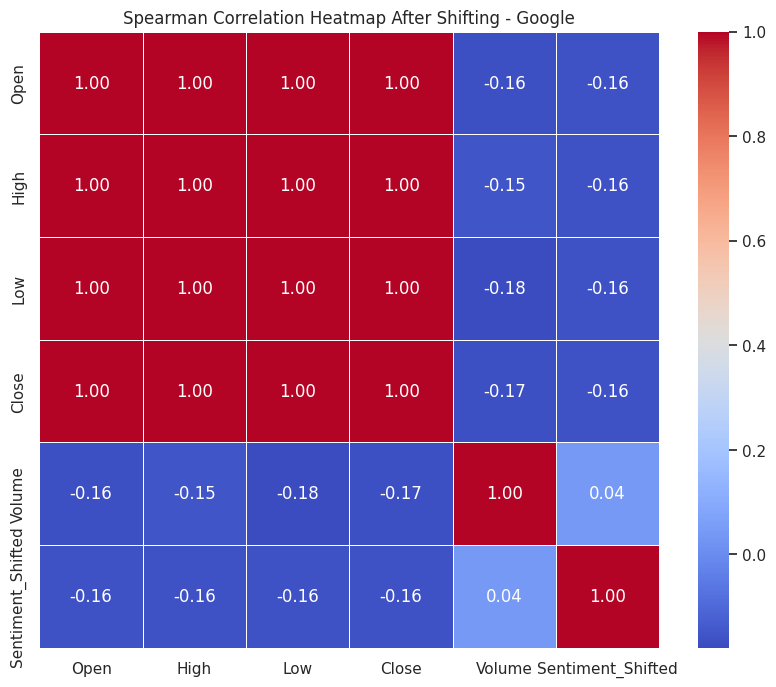

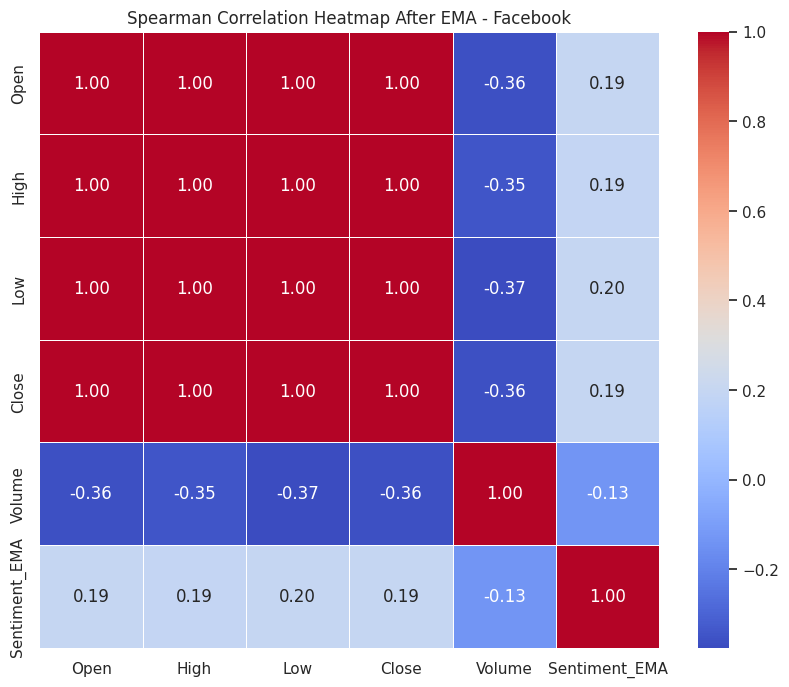

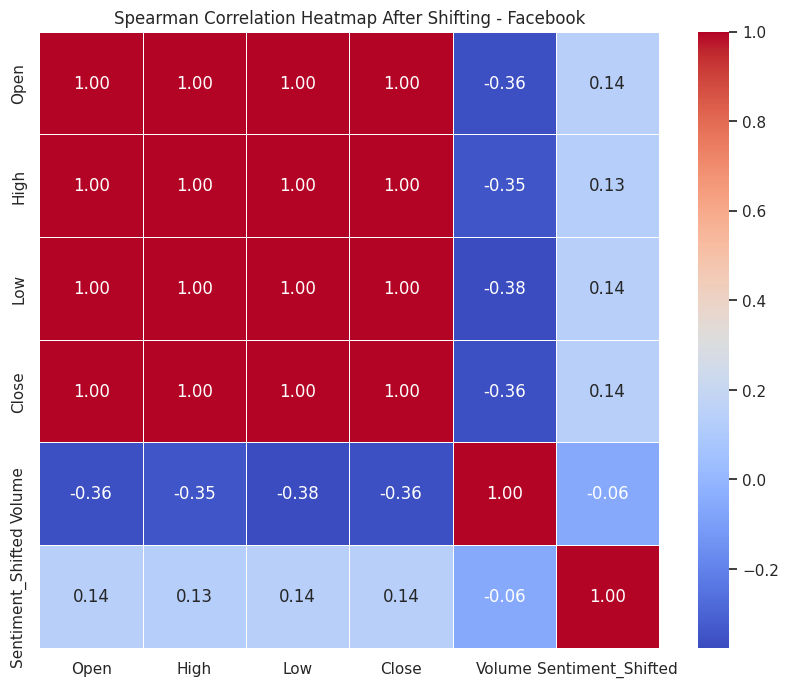

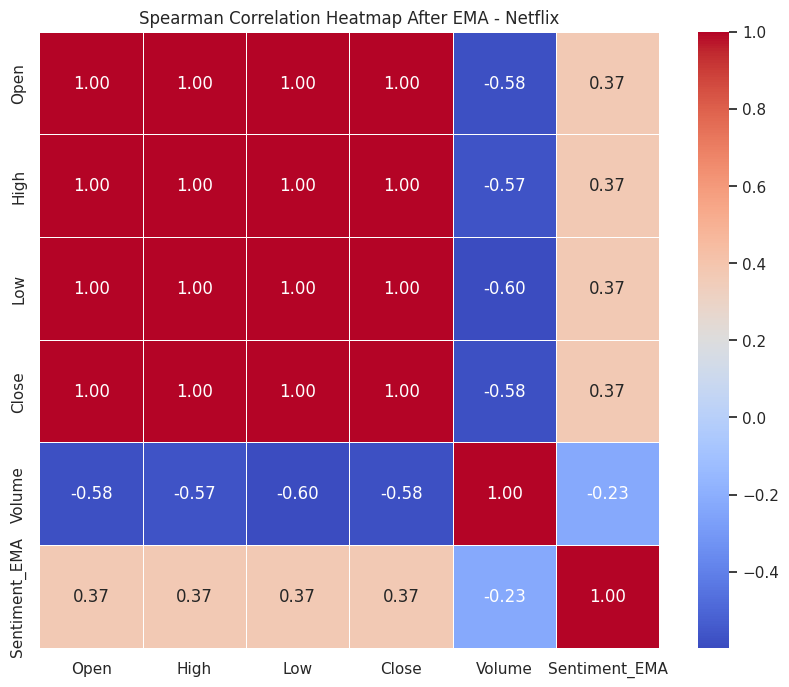

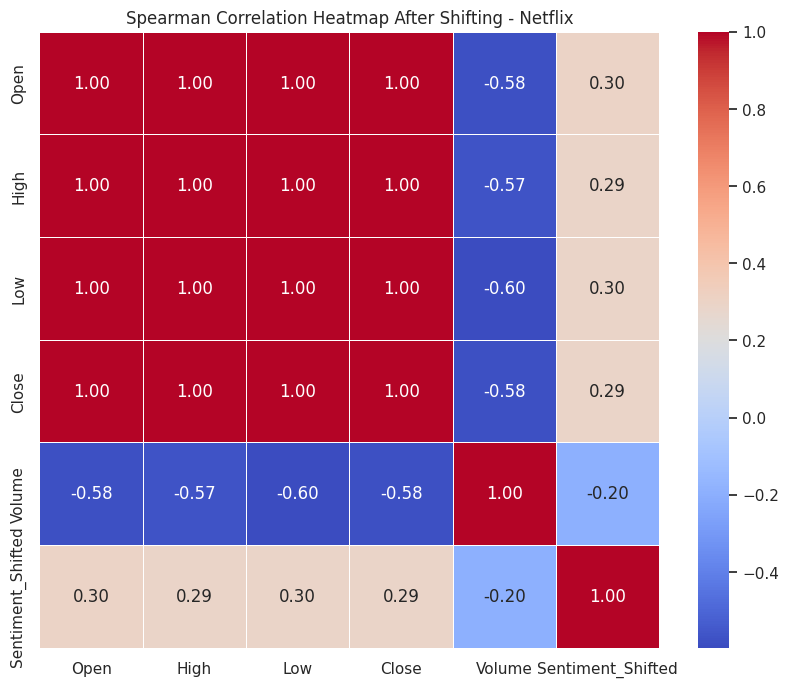

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_spearman_correlation_heatmap_after_ema(df, model_results, stock_name):
    # Obtener el mejor lag según el AIC para la variable 'Sentiment'
    best_lag_aic = model_results['Best Lag AIC']

    # Aplicar el EMA con el mejor lag a la variable 'Sentiment'
    ema_sentiment = df['Sentiment'].ewm(span=best_lag_aic, adjust=False).mean()

    # Reorganizar el DataFrame para que 'Close', 'Low' y 'Volume' estén en las últimas columnas
    ema_df = pd.concat([df[['Open', 'High', 'Low', 'Close', 'Volume']], ema_sentiment], axis=1)
    ema_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment_EMA']

    # Calcular la matriz de correlación de Spearman
    spearman_correlation_matrix = ema_df.corr(method='spearman')

    # Visualizar la matriz de correlación de Spearman
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f"Spearman Correlation Heatmap After EMA - {stock_name}")
    plt.show()

def calculate_spearman_correlation_heatmap_after_shift(df, model_results, stock_name):
    # Obtener el mejor lag según el AIC para la variable 'Sentiment'
    best_lag_aic = model_results['Best Lag AIC']

    # Aplicar el shift (desplazamiento) con el mejor lag a la variable 'Sentiment'
    shifted_sentiment = df['Sentiment'].shift(best_lag_aic)

    # Reorganizar el DataFrame para que 'Close', 'Low' y 'Volume' estén en las últimas columnas
    shifted_df = pd.concat([df[['Open', 'High', 'Low', 'Close', 'Volume']], shifted_sentiment], axis=1)
    shifted_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment_Shifted']
    shifted_df = shifted_df.dropna()  # Eliminar filas con valores NaN

    # Calcular la matriz de correlación de Spearman
    spearman_correlation_matrix = shifted_df.corr(method='spearman')

    # Visualizar la matriz de correlación de Spearman
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f"Spearman Correlation Heatmap After Shifting - {stock_name}")
    plt.show()

#Ejemplo guardar

# Ejemplo de uso para Amazon
calculate_spearman_correlation_heatmap_after_ema(amazon_s, model_results_amazon, "Amazon")
calculate_spearman_correlation_heatmap_after_shift(amazon_s, model_results_amazon, "Amazon")

# Ejemplo de uso para Apple
calculate_spearman_correlation_heatmap_after_ema(apple_s, model_results_apple, "Apple")
calculate_spearman_correlation_heatmap_after_shift(apple_s, model_results_apple, "Apple")

# Ejemplo de uso para Google
calculate_spearman_correlation_heatmap_after_ema(google_s, model_results_google, "Google")
calculate_spearman_correlation_heatmap_after_shift(google_s, model_results_google, "Google")

# Ejemplo de uso para Facebook
calculate_spearman_correlation_heatmap_after_ema(facebook_s, model_results_facebook, "Facebook")
calculate_spearman_correlation_heatmap_after_shift(facebook_s, model_results_facebook, "Facebook")

# Ejemplo de uso para Netflix
calculate_spearman_correlation_heatmap_after_ema(netflix_s, model_results_netflix, "Netflix")
calculate_spearman_correlation_heatmap_after_shift(netflix_s, model_results_netflix, "Netflix")


### 2a Opcion: Calcular lag con Diferenciación

In [ ]:
def calculate_distance_correlation_heatmap_after_ema(df, model_results, stock_name):
    # Obtener el mejor lag según el AIC para la variable 'Sentiment'
    best_lag_aic = model_results['Best Lag AIC']

    # Aplicar el EMA con el mejor lag a la variable 'Sentiment'
    ema_sentiment = df['Sentiment'].ewm(span=best_lag_aic, adjust=False).mean()

    # Reorganizar el DataFrame para que 'Close', 'Low' y 'Volume' estén en las últimas columnas
    ema_df = pd.concat([df[['Open', 'High', 'Low', 'Close', 'Volume']], ema_sentiment], axis=1)
    ema_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment_EMA']

    # Calcular la matriz de distancia de correlación
    distance_correlation_matrix = distance_corr_matrix(ema_df)

    # Visualizar la matriz de distancia de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(distance_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f"Distance Correlation Heatmap After EMA - {stock_name}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


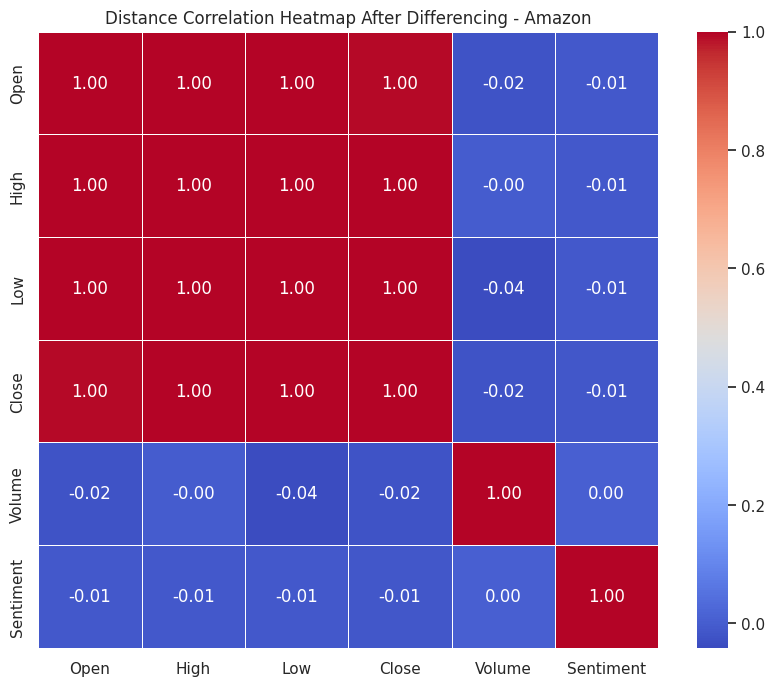

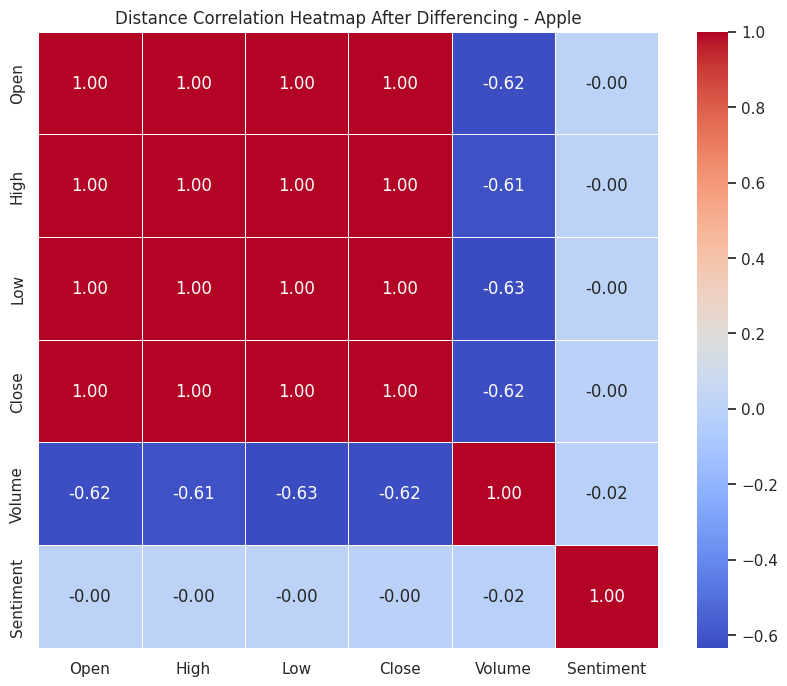

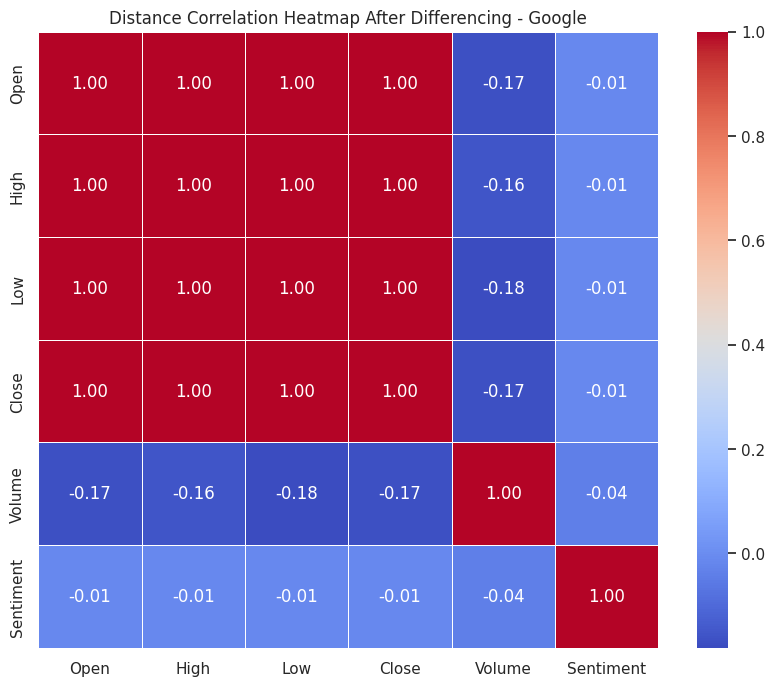

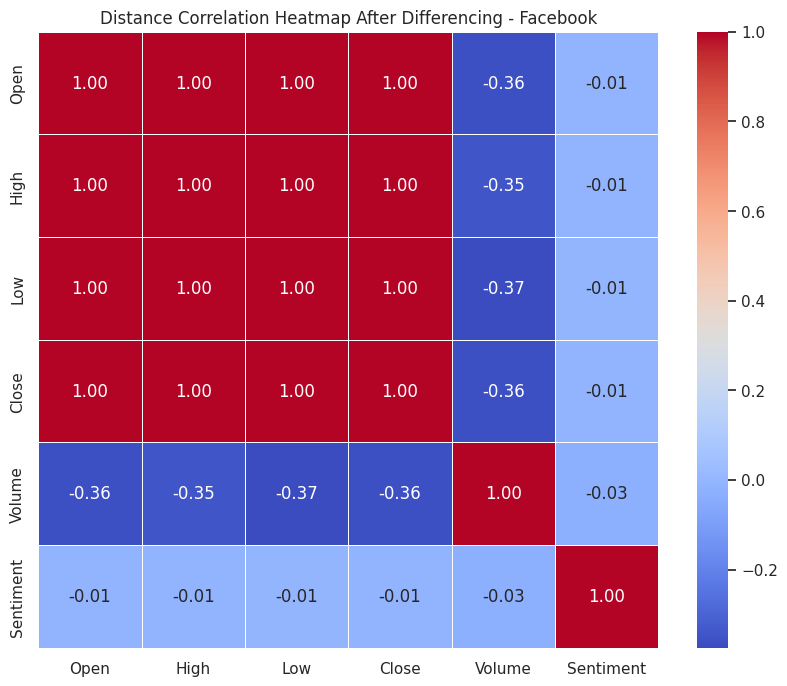

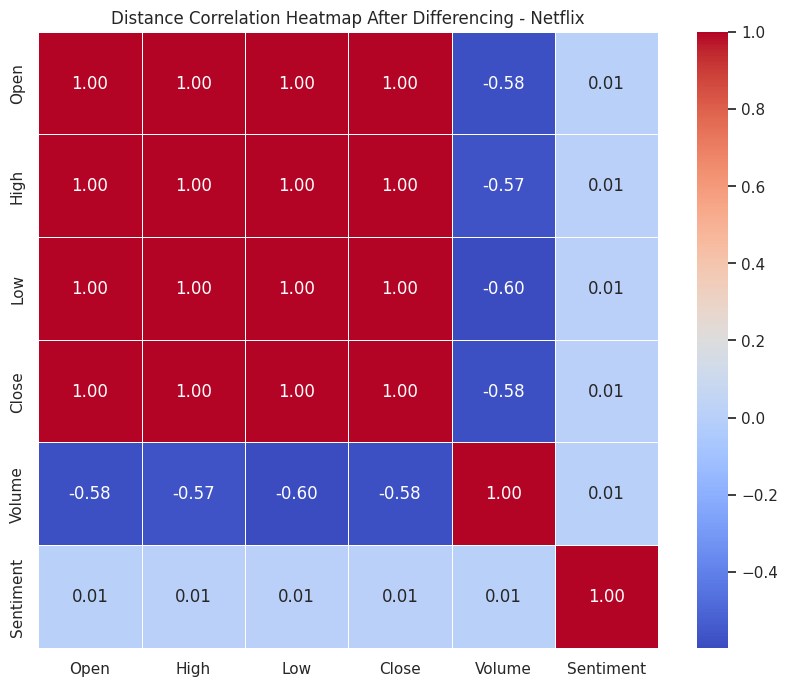

In [ ]:
def calculate_distance_correlation_heatmap_after_differencing(df, model_results, stock_name):
    # Obtener el mejor lag según el AIC para 'Sentiment'
    best_lag_aic = model_results['Best Lag AIC']

    # Diferenciar los datos según el mejor lag para 'Sentiment'
    differenced_data = df.copy()
    differenced_data['Sentiment'] = differenced_data['Sentiment'].diff(best_lag_aic)

    # Calcular la matriz de distancia de correlación
    distance_correlation_matrix = differenced_data.corr(method="spearman")

    # Visualizar la matriz de distancia de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(distance_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f"Distance Correlation Heatmap After Differencing - {stock_name}")
    plt.show()

# Ejemplo de uso para Amazon
calculate_distance_correlation_heatmap_after_differencing(amazon_s, model_results_amazon, "Amazon")

# Ejemplo de uso para Apple
calculate_distance_correlation_heatmap_after_differencing(apple_s, model_results_apple, "Apple")

# Ejemplo de uso para Google
calculate_distance_correlation_heatmap_after_differencing(google_s, model_results_google, "Google")

# Ejemplo de uso para Facebook
calculate_distance_correlation_heatmap_after_differencing(facebook_s, model_results_facebook, "Facebook")

# Ejemplo de uso para Netflix
calculate_distance_correlation_heatmap_after_differencing(netflix_s, model_results_netflix, "Netflix")


https://towardsdatascience.com/introducing-distance-correlation-a-superior-correlation-metric-d569dc8900c7

### Causality test Granger 1a Opcion: Calcular lag con Exponential Moving Average (EMA)

In [ ]:
import warnings
from statsmodels.tsa.stattools import grangercausalitytests

def calculate_granger_causality_for_all_companies(company_name, model_results, ema_values):
    # Obtener todas las variables excepto 'Close'
    variables_to_pair = [col for col in ema_values.columns if col != 'Close']
    best_lags = {variable: model_results['Best Lag AIC'] for variable in ema_values.columns if variable != 'Close'}
    print(f"Empresa: {company_name}")
    for variable in variables_to_pair:
        lag_optimo = best_lags[variable]
        granger_data = ema_values[['Close', variable]].dropna()

        # Desactivar temporalmente los warnings relacionados con la deprecación de verbose
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            warnings.filterwarnings("ignore", category=DeprecationWarning)
            granger_result = grangercausalitytests(granger_data, lag_optimo, verbose=False)

        min_lag = 0
        for i in range(lag_optimo):
            if granger_result[i+1][0]['ssr_ftest'][1] < 0.1:
                min_lag = i+1
                break

        granger_optim = granger_result[lag_optimo]
        print(f"P.value Close - {variable}: {granger_optim[0]['ssr_ftest'][1]}")

# Uso de la función con los parámetros adecuados
calculate_granger_causality_for_all_companies("Amazon", model_results_amazon, ema_values_amazon_s)
calculate_granger_causality_for_all_companies("Apple", model_results_apple, ema_values_apple_s)
calculate_granger_causality_for_all_companies("Google", model_results_google, ema_values_google_s)
calculate_granger_causality_for_all_companies("Facebook", model_results_facebook, ema_values_facebook_s)
calculate_granger_causality_for_all_companies("Netflix", model_results_netflix, ema_values_netflix_s)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empresa: Amazon
P.value Close - Open: 0.10090734504476874
P.value Close - High: 0.9393152323369423
P.value Close - Low: 0.07436100350165109
P.value Close - Volume: 0.5516580516521805
P.value Close - Sentiment_EMA: 0.5222470123200608
Empresa: Apple
P.value Close - Open: 0.65981511594581
P.value Close - High: 0.4427213749441272
P.value Close - Low: 0.2693259084416436
P.value Close - Volume: 0.19074541983610938
P.value Close - Sentiment_EMA: 0.43175225914778753
Empresa: Google
P.value Close - Open: 0.11438650699009666
P.value Close - High: 0.42882178901863
P.value Close - Low: 0.20936196875783428
P.value Close - Volume: 0.6859179792735552
P.value Close - Sentiment_EMA: 0.3335239852273384
Empresa: Facebook
P.value Close - Open: 0.49166113441238557
P.value Close - High: 0.8311670645208754
P.value Close - Low: 0.005236552347902107
P.value Close - Volume: 0.31831674168800206
P.value Close - Sentiment_EMA: 0.5053775818009958
Empresa: Netflix
P.value Close - Open: 0.28500902744834183
P.value Cl

In [ ]:
import warnings
from statsmodels.tsa.stattools import grangercausalitytests

def calculate_granger_causality_for_all_companies(company_name, model_results, ema_values):
    # Obtener todas las variables excepto 'Close'
    variables_to_pair = [col for col in ema_values.columns if col != 'Close']
    best_lags = {variable: model_results['Best Lag AIC'] for variable in ema_values.columns if variable != 'Close'}

    print(f"Empresa: {company_name}")
    for variable in variables_to_pair:
        lag_optimo = best_lags[variable]
        granger_data = ema_values[['Close', variable]].dropna()

        # Desactivar temporalmente los warnings relacionados con la deprecación de verbose
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            warnings.filterwarnings("ignore", category=DeprecationWarning)
            granger_result = grangercausalitytests(granger_data, lag_optimo, verbose=False)

        min_lag = 0
        for i in range(lag_optimo):
            if granger_result[i+1][0]['ssr_ftest'][1] < 0.1:
                min_lag = i+1
                break

        granger_optim = granger_result[lag_optimo]
        print(f"P.value Close - {variable}: {granger_optim[0]['ssr_ftest'][1]}")

# Uso de la función con los parámetros adecuados
calculate_granger_causality_for_all_companies("Amazon", model_results_amazon, ema_values_amazon_s)
calculate_granger_causality_for_all_companies("Apple", model_results_apple, ema_values_apple_s)
calculate_granger_causality_for_all_companies("Google", model_results_google, ema_values_google_s)
calculate_granger_causality_for_all_companies("Facebook", model_results_facebook, ema_values_facebook_s)
calculate_granger_causality_for_all_companies("Netflix", model_results_netflix, ema_values_netflix_s)


Empresa: Amazon


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


P.value Close - Open: 0.10090734504476874
P.value Close - High: 0.9393152323369423
P.value Close - Low: 0.07436100350165109
P.value Close - Volume: 0.5516580516521805
P.value Close - Sentiment_EMA: 0.5222470123200608
Empresa: Apple
P.value Close - Open: 0.65981511594581
P.value Close - High: 0.4427213749441272
P.value Close - Low: 0.2693259084416436
P.value Close - Volume: 0.19074541983610938
P.value Close - Sentiment_EMA: 0.43175225914778753
Empresa: Google
P.value Close - Open: 0.11438650699009666
P.value Close - High: 0.42882178901863
P.value Close - Low: 0.20936196875783428
P.value Close - Volume: 0.6859179792735552
P.value Close - Sentiment_EMA: 0.3335239852273384
Empresa: Facebook
P.value Close - Open: 0.49166113441238557
P.value Close - High: 0.8311670645208754
P.value Close - Low: 0.005236552347902107
P.value Close - Volume: 0.31831674168800206
P.value Close - Sentiment_EMA: 0.5053775818009958
Empresa: Netflix
P.value Close - Open: 0.28500902744834183
P.value Close - High: 0.69

In [ ]:
import warnings
from statsmodels.tsa.stattools import grangercausalitytests

def calculate_granger_causality_for_all_companies(company_name, model_results, ema_values):
    # Obtener todas las variables excepto 'Close'
    variables_to_pair = [col for col in ema_values.columns if col != 'Close']
    best_lags = {variable: model_results['Best Lag AIC'] for variable in ema_values.columns if variable != 'Close'}

    print(f"Empresa: {company_name}")
    for variable in variables_to_pair:
        lag_optimo = best_lags[variable]
        granger_data = ema_values[[variable, 'Close']].dropna()

        # Desactivar temporalmente los warnings relacionados con la deprecación de verbose
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            granger_result = grangercausalitytests(granger_data, lag_optimo, verbose=False)

        min_lag = 0
        for i in range(lag_optimo):
            if granger_result[i+1][0]['ssr_ftest'][1] < 0.1:
                min_lag = i+1
                break

        granger_optim = granger_result[lag_optimo]
        print(f"P.value {variable} - Close: {granger_optim[0]['ssr_ftest'][1]}")

# Uso de la función con los parámetros adecuados
calculate_granger_causality_for_all_companies("Amazon", model_results_amazon, ema_values_amazon_s)
calculate_granger_causality_for_all_companies("Apple", model_results_apple, ema_values_apple_s)
calculate_granger_causality_for_all_companies("Google", model_results_google, ema_values_google_s)
calculate_granger_causality_for_all_companies("Facebook", model_results_facebook, ema_values_facebook_s)
calculate_granger_causality_for_all_companies("Netflix", model_results_netflix, ema_values_netflix_s)


Empresa: Amazon


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


P.value Open - Close: 4.822893510829834e-227
P.value High - Close: 8.049886150203311e-65
P.value Low - Close: 1.9598043898029823e-58
P.value Volume - Close: 0.7369055224762262
P.value Sentiment_EMA - Close: 1.4828520726872808e-23
Empresa: Apple
P.value Open - Close: 4.275576860714864e-266
P.value High - Close: 6.680680347945343e-86
P.value Low - Close: 2.7499315027084745e-62
P.value Volume - Close: 0.1243711844318908
P.value Sentiment_EMA - Close: 4.355889547763393e-26
Empresa: Google
P.value Open - Close: 2.9453889639769633e-197
P.value High - Close: 2.648686878562725e-51
P.value Low - Close: 1.5914476830770944e-52
P.value Volume - Close: 0.06755942748359531
P.value Sentiment_EMA - Close: 0.004858726492949114
Empresa: Facebook
P.value Open - Close: 4.0346923230100265e-166
P.value High - Close: 1.8976297072946889e-47
P.value Low - Close: 1.936482513839866e-43
P.value Volume - Close: 0.0006534066149012565
P.value Sentiment_EMA - Close: 0.00046130737893679806
Empresa: Netflix
P.value Ope

### Causality test Granger 2a Opcion: Calcular lag con diferenciación

In [ ]:
import warnings
from statsmodels.tsa.stattools import grangercausalitytests

def calculate_granger_causality_for_all_companies(company_name, model_results, ema_values):
    # Obtener todas las variables excepto 'Close'
    variables_to_pair = [col for col in ema_values.columns if col != 'Close']
    best_lags = {variable: model_results['Best Lag AIC'] for variable in ema_values.columns if variable != 'Close'}

    print(f"Empresa: {company_name}")
    for variable in variables_to_pair:
        lag_optimo = best_lags[variable]
        granger_data = ema_values[['Close', variable]].dropna()

        # Desactivar temporalmente los warnings relacionados con la deprecación de verbose
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            warnings.filterwarnings("ignore", category=DeprecationWarning)
            granger_result = grangercausalitytests(granger_data, lag_optimo, verbose=False)

        min_lag = 0
        for i in range(lag_optimo):
            if granger_result[i+1][0]['ssr_ftest'][1] < 0.1:
                min_lag = i+1
                break

        granger_optim = granger_result[lag_optimo]
        print(f"P.value Close - {variable}: {granger_optim[0]['ssr_ftest'][1]}")

# Uso de la función con los parámetros adecuados
calculate_granger_causality_for_all_companies("Amazon", model_results_amazon, lagged_data_amazon)
calculate_granger_causality_for_all_companies("Apple", model_results_apple, lagged_data_apple)
calculate_granger_causality_for_all_companies("Google", model_results_google, lagged_data_google)
calculate_granger_causality_for_all_companies("Facebook", model_results_facebook, lagged_data_facebook)
calculate_granger_causality_for_all_companies("Netflix", model_results_netflix, lagged_data_netflix)


Empresa: Amazon
P.value Close - Open: 0.10244786342515698
P.value Close - High: 0.9399578647564603


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


P.value Close - Low: 0.0747831757718728
P.value Close - Volume: 0.5590964909392638
P.value Close - Sentiment: 0.41528647445948325
P.value Close - Sentiment Lag 1: 0.43737145259776056
P.value Close - Sentiment Lag 2: 0.3950440440109096
P.value Close - Sentiment Lag 3: 0.352861565100277
P.value Close - Sentiment Lag 4: 0.3432295802953349
P.value Close - Sentiment Lag 5: 0.3295629261104378
P.value Close - Sentiment Lag 6: 0.1301529304102775
P.value Close - Sentiment Lag 7: 0.17615298893664147
P.value Close - Sentiment Lag 8: 0.1745589483364235
P.value Close - Sentiment Lag 9: 0.1781443174933593
P.value Close - Sentiment Lag 10: 0.35198083507431854
Empresa: Apple
P.value Close - Open: 0.6685687596401182
P.value Close - High: 0.43262312244862405
P.value Close - Low: 0.27296271423811685
P.value Close - Volume: 0.1647239417742506
P.value Close - Sentiment: 0.48212901748876946
P.value Close - Sentiment Lag 1: 0.5961363294403105
P.value Close - Sentiment Lag 2: 0.8517253443755698
P.value Close 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Distribución variables

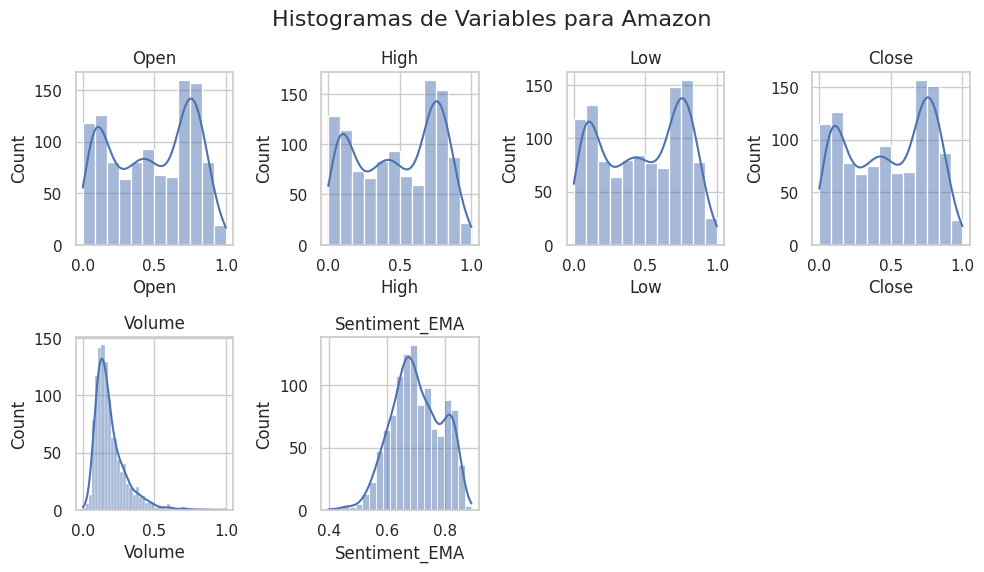

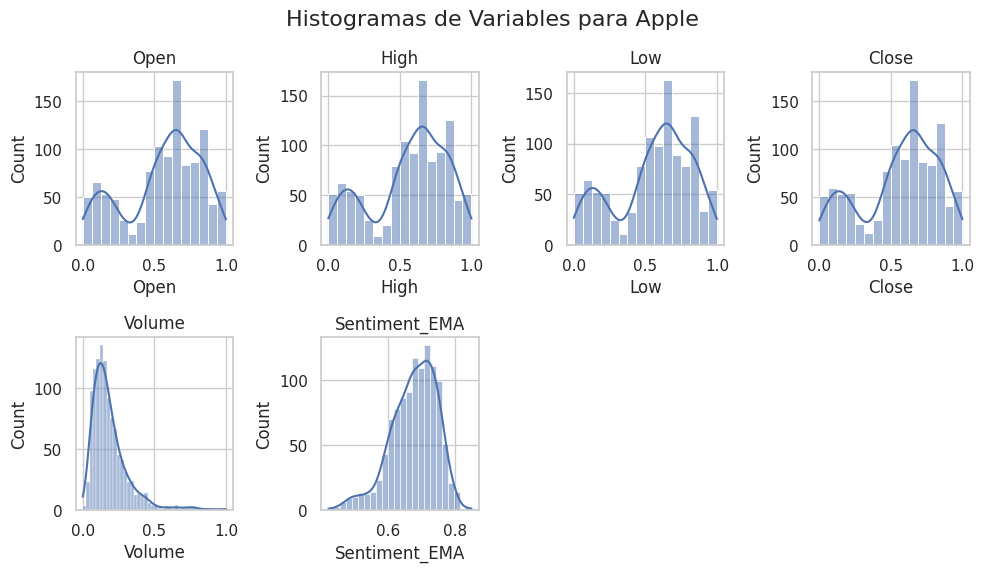

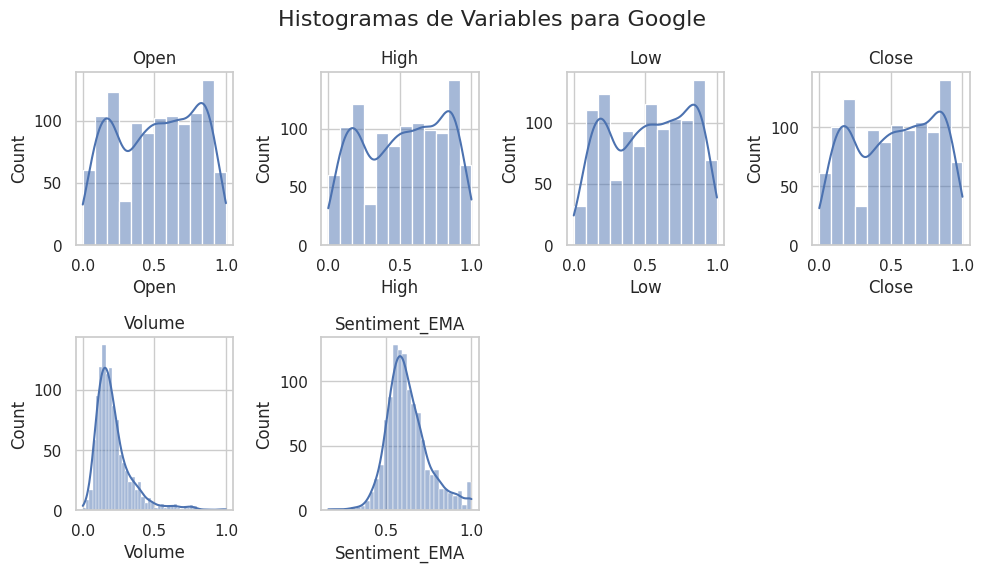

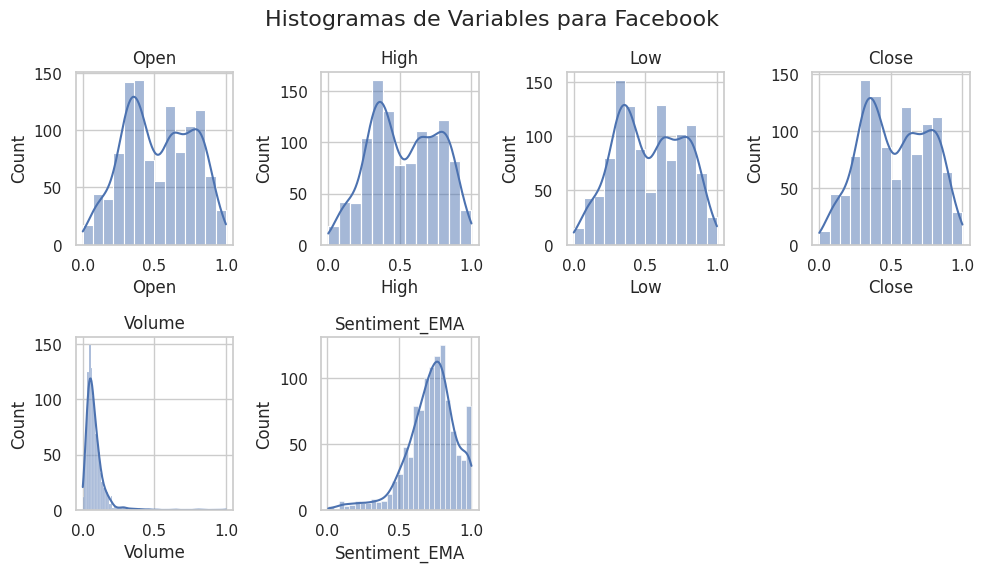

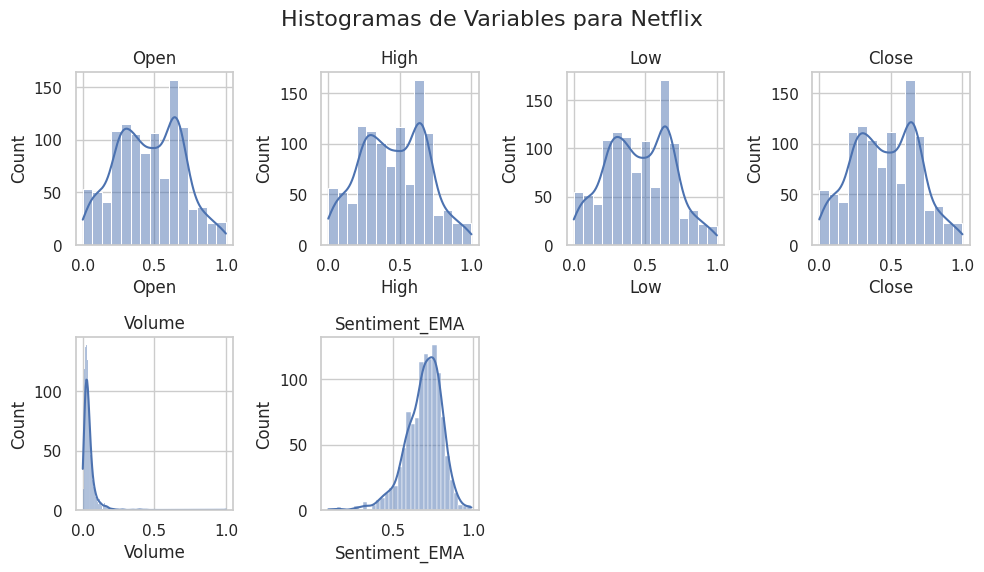

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def plot_histograms_for_all_companies(ema_values_s, company_name):
    warnings.filterwarnings("ignore", message="np.find_common_type is deprecated", category=DeprecationWarning)

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 8))
    for column in ema_values_s.columns:
        plt.subplot(3, 4, ema_values_s.columns.get_loc(column) + 1)
        sns.histplot(ema_values_s[column], kde=True)
        plt.title(column)

    plt.suptitle(f"Histogramas de Variables para {company_name}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Utilizar la función para cada empresa
plot_histograms_for_all_companies(ema_values_amazon_s, "Amazon")
plot_histograms_for_all_companies(ema_values_apple_s, "Apple")
plot_histograms_for_all_companies(ema_values_google_s, "Google")
plot_histograms_for_all_companies(ema_values_facebook_s, "Facebook")
plot_histograms_for_all_companies(ema_values_netflix_s, "Netflix")
